In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off for raw code"></form>
''')

![DMW2_FP_Write_Up_Banner.png](DMW2_FP_Write_Up_Banner.png)

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Abstract</h2>

The purpose of this initiative is to develop multiple recommender systems that can provide personalized product recommendations to e-commerce platform users based on a variety of factors such as purchase history, product ratings, and interests of similar users. It also aims to compare the performance of these recommendation models across different metrics. 

The process involved scraping the data from Amazon.com using Crawlbase API, an all-in-one data crawling and scraping platform, based on defined search terms. After preprocessing, the aggregated data is then fed to recommender system models including Neighborhood-Based Collaborative Filtering, Latent Factor-Based Collaborative Filtering, Content-Based Recommender System, as well as a Hybrid Recommender System using LightFM, to generate product recommendations for users with at least five product reviews.  

After a thorough analysis of the results, the team was able to identify 2 tiers of multimodel recommender systems that would be appropriate for the specific application / requirement of digital market owners and thereby deliver the most business value.  

<p style="text-align: center;"><strong>Table 1: Basic Recommender System</strong></p>

| Model Name | Algorithm | Description | NDCG @ k=10 |
|-----|-----|-----|-----|
| Payak | KNN Basic | Recommends products based on your closest friends | 0.27 |
| Damayan |KNN with Means | Optimized method of recommending products based on your closest friends | 0.27 |
| Aparte | SVD | Recommends products based on common patterns between users and items | 0.26 |

<p style="text-align: center;"><strong>Table 2: Premium Recommender System</strong></p>

| Model Name | Algorithm | Description | NDCG @ k=10 |
|-----|-----|-----|-----|
| Barkada | Latent Factor Based Collaborative Filtering (ALS) | Recommends Products based on your closest friends | 0.99 |
| Suki | Content-Based Recommender System | Recommends Products based on your previous purchase history | 0.96 |
| Sari-sari | Hybrid Recommender System | Recommends a variety of Products that you might like based on your previous purchase history and your closest friends | 0.99 |

The results showed that the recommendations provided by the algorithms are more personalized compared to the baseline global average, which merely offers the top K most popular items.  The algorithms demonstrate a clear connection between users' history and characteristics, resulting in more relevant and engaging recommendations. While offline evaluation metrics indicate the effectiveness of the algorithms, the real test lies in online evaluation metrics, which will provide a more accurate assessment of performance in a live environment. 

The offline evaluation results and metrics suggest that all the recommender systems performed equally well, including the hybrid model using LightFM. Despite having low NDCG scores, the "Basic" recommendation systems still have their merits, recommending relevant items to the sampled users. "Premium" recommendation systems yielded the highest NDCG scores. LightFM's recommendations stand out for their ability to leverage both item and user metadata while addressing the cold start problem, generating relevant and potentially exploratory recommendations that enhance users' experience and satisfaction with the platform. 

To make the recommender systems more robust, the researchers suggest the following: 

1. Consider Contextual Factors  

2. Incorporate Real-time Data Processing  

3. Integrate a Feedback Loop Mechanism 

4. Implement Advanced Algorithms 

5. Employ Predictive Models 

6. Optimize Performance of Developed Models 

Overall, the project has succeeded in developing recommender systems that unlock new market opportunities, boost user engagement, and improve the overall competitiveness of small-scale and emerging online businesses in the digital marketplace.

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Introduction</h2>

For the past three decades, e-commerce has revolutionized the way we shop. Shopping has evolved beyond the traditional notion of visiting a physical store, selecting items, and making purchases. What once took hours can now be accomplished in seconds, at one’s fingertips. 

According to McKinsey, E-commerce has been growing consistently ever since the first online transaction in 1994, when someone sold his friend a Sting CD for $12.48 plus shipping. But when the COVID-19 pandemic hit, triggering lockdowns all over the world, customers went all-in: year-over-year growth of e-commerce as a share of total retail sales grew 1.6 times in China, 3.3 times in the United States, and 4.5 times in the United Kingdom. E-commerce sales penetration in the United States more than doubled to 35 percent in 2020 from the previous year, roughly the equivalent of ten years of growth. Globally, nearly 20 percent of total global sales in 2021 were made from online purchases. By 2025, nearly a quarter of all global sales are expected to be made online [[1]]((https://www.mckinsey.com/featured-insights/mckinsey-explainers/what-is-e-commerce)).

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Problem Statement</h2>

In the rapidly evolving landscape of e-commerce, small-scale and emerging online businesses face significant challenges in competing with industry giants. This is primarily due to the significant influence and market dominance of these big players but also due to limitations on the end of the small players. One of these limitations is the lack of offering personalized experiences to users. While the likes of Amazon, Alibaba, Rakuten, and Shopify have been leveraging recommendation systems to drive sales and overall success, up-and-coming platforms are in need of similar technology to provide tailored product recommendations to unlock new market opportunities, boost user engagement, and improve overall competitiveness in the digital marketplace. 

To address this critical issue, this project aims to: 

1. Develop multiple recommender systems that can provide personalized product recommendations to e-commerce platform users based on their purchase history, product ratings, and the interests of similar users. 

2. Compare the performance of these recommender systems across different metrics and identify which models work best for specific applications and purposes. 

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Motivation</h2>

Amazon is the largest e-commerce brand in the world in terms of revenue and market share [[2]]((https://www.statista.com/statistics/1103390/amazon-retail-ecommerce-sales-global/)). It currently uses a hybrid recommender system – a combination of collaborative and content-based filtering in its platforms which had largely influenced the company’s success. In 2023, Amazon's net revenue from e-commerce net sales was US$575 billion [[3]]((https://s2.q4cdn.com/299287126/files/doc_financials/2023/q4/AMZN-Q4-2023-Earnings-Release.pdf)), and as of 2021, about 35 percent of all sales on Amazon happen via recommendations [[4]]((https://www.datafeedwatch.com/blog/amazon-statistics#6.-amazon%E2%80%99s-recommendations)). 


Recommendations personalized based on a user's past interactions and interests make it very likely for that user to find the recommended product interesting as well. In fact, according to a study of Epsilon Marketing, 80% percent of consumers are more likely to purchase from a brand that delivers personalized content [[5]]((https://www.slideshare.net/EpsilonMktg/the-power-of-me-the-impact-of-personalization-on-marketing-performance#1)). In another study conducted by PracticalEcommerce, it was found that brands who provide recommendations experiences higher conversions rates than those who don’t and that customers who click on product recommendations are 4 times more likely to add that product to cart and complete the purchase [[6]]((https://www.practicalecommerce.com/study-personalized-recommendations-produce-4-times-conversions)).

This clearly demonstrates the impact of recommendations. In this study, our team looks to develop recommender systems using Amazon products and users as a testbed. Based on the results, the team will infer which algorithms perform the best for different situations. The resulting models can serve as a tool for up-and-coming e-commerce players to increase engagement and conversions. Overall, the study would benefit these entities by elevating user experience, improving item discoverability, increase average cart size, and target users more accurately.

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Preliminaries</h2>

#### Recommender Systems 

The basic idea of recommender systems is to utilize various sources of data to infer customer interests. The entity to which the recommendation is provided is referred to as the user, and the product being recommended is also referred to as an item. Therefore, recommendation analysis is often based on the interaction between users and items, because past interests and proclivities are often good indicators of future choices [[8]]((https://pzs.dstu.dp.ua/DataMining/recom/bibl/1aggarwal_c_c_recommender_systems_the_textbook.pdf)).

#### Collaborative Filtering 

Collaborative Filtering models make recommendations by leveraging the collaborative power of ratings provided by multiple users. In this method, the descriptive attributes of an item are not explicitly used in providing recommendations. 
The two main classes of collaborative filtering methods are: 
* Neighborhood-based method also known as memory-based method 
* Model-based method also known as latent factor model 

#### Content-Based Recommender System 

Content-based recommender models make recommendations by using the descriptive attributes of items. The system does not consider how other users rated the items but instead relies on its features and provide item recommendations similar to items highly rated by the user. 
This user-specific model is used to predict whether the corresponding individual will like an item for which her rating or buying behavior is unknown [[9]]((https://pzs.dstu.dp.ua/DataMining/recom/bibl/1aggarwal_c_c_recommender_systems_the_textbook.pdf)).

#### Hybrid Recommender System Using LightFM 

As per LightFM documentation, LightFM is a hybrid recommender system that handles both explicit and implicit feedback. Its main feature is its ability to incorporate user and item metadata into the matrix factorization models. This enhances the capability to recommend new items to users and to adapt to new users' preferences based on their features [[10]](http://ceur-ws.org/Vol-1448/paper4.pdf).  

The core of LightFM lies in its hybrid model, which combines traditional collaborative filtering methods with content-based approaches through latent representations [[10]](http://ceur-ws.org/Vol-1448/paper4.pdf). It represents users and items in a shared high-dimensional space, where the embeddings of users and items can be combined to predict a user's preference for an item [[11]](https://making.lyst.com/lightfm/docs/home.html). The strength of this model is in its ability to generalize across users and items, making it highly effective for scenarios where cold-start or sparsity issues are prevalent. 

LightFM provides several loss functions to optimize the recommendation model, catering to different scenarios of feedback and objectives. These include Logistic Loss, Bayesian Personalised Ranking (BPR) Loss, Weighted Approximate-Rank Pairwise (WARP) Loss, and k-Order Statistic Loss (k-OS WARP) [[11]](https://making.lyst.com/lightfm/docs/home.html). Each of these loss functions is designed to handle different types of data and recommendation scenarios, from explicit positive and negative interactions to implicit feedback where only positive interactions are present [[10]](http://ceur-ws.org/Vol-1448/paper4.pdf).

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Import Libraries and Define File Paths</h2> 

In [ ]:
import os
import glob
import json
import scipy
import random
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import threadpoolctl
from tqdm import tqdm
import warnings
from collections import defaultdict
from implicit.als import AlternatingLeastSquares as ALS
from lightfm import LightFM
from lightfm.data import Dataset as LightFMDataset
from scipy.sparse import coo_matrix
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score
from lightfm.cross_validation import random_train_test_split
from math import log2 as log
from scipy.spatial import distance
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, KFold
from surprise.model_selection import train_test_split as train_test_split_surprise
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import SVD
from implicit.evaluation import (AUC_at_k,
                                 mean_average_precision_at_k,
                                 ndcg_at_k, precision_at_k)
from implicit.evaluation import train_test_split
from unidecode import unidecode
import uuid

warnings.simplefilter(action='ignore', category=FutureWarning)

dir = "../dataset/utility"

if not os.path.exists(dir):
    os.mkdir(dir)

### Global Libraries and Functions: 


`import os`: This module provides a portable way of using operating system-dependent functionality. 

`import glob`: This module finds all the pathnames matching a specified pattern. 

`import json`: This module encodes and decodes JSON data. 

`import scipy`: This module provides many user-friendly and efficient numerical routines. 

`import random`: This module implements pseudo-random number generators for various distributions. 

`import re`: This module provides support for regular expressions. 

`import pandas` as pd: This library provides data structures and data analysis tools. 

`import numpy` as np: This library adds support for large, multi-dimensional arrays and matrices, along with a collection of    mathematical functions to operate on these arrays. 

`import matplotlib.pyplot` as plt: This library provides a MATLAB-like plotting framework. 

`from tqdm import tqdm`: This library provides a fast, extensible progress bar for loops and pipelines. 

`import warnings`: This module provides warnings control functionality. 

`from collections import defaultdict`: This module provides a defaultdict class which is a subclass of the built-in dict class. 

`import threadpoolctl`: This module controls the number of threads used by BLAS libraries. 

`from unidecode import unidecode`: This library provides functions to convert Unicode data to ASCII. 

`from math import log2 as log`: This imports the log2 function from the math module and renames it to log. 

`import uuid`: This module provides immutable UUID objects.  

### Utility and Dataset Generation Functions: 

`clean_str(x)`: Cleans a given string by converting Unicode characters to ASCII, replacing spaces with underscores, converting to lowercase, and removing specified forbidden characters. 

`items_and_reviews_to_dataframe(json_data, folder_names)`: Processes JSON data on products and their reviews, and returns three DataFrames: 

- `all_reviews_df`: DataFrame containing review information. 

- `all_items_df`: DataFrame containing product information. 

- `asins_df`: DataFrame mapping ASINs to product names and folder names. 

`get_all_json_data()`: Utility function that loads JSON data from specified directories and returns the data along with corresponding folder names. 

  
`load_dataset()`: Reads CSV files containing preprocessed item data, utility data, review data, and ASIN-to-product mapping data, and returns DataFrames for each dataset. Additionally, it prints the shapes of the loaded DataFrames. 

### Recommender System Libraries: 

`from implicit.als import AlternatingLeastSquares as ALS`: This imports the Alternating Least Squares algorithm from the implicit package for collaborative filtering-based recommendation systems. 

 `from lightfm import LightFM`: This imports the LightFM model, a hybrid recommendation algorithm combining collaborative filtering and matrix factorization techniques. 

 `from lightfm.data import Dataset as LightFMDataset`: This imports the Dataset class from LightFM for handling recommendation datasets. 

 `from scipy.sparse import coo_matrix`: This imports the coo_matrix class for constructing sparse matrices. 

 `from lightfm.evaluation import precision_at_k, recall_at_k, auc_score`: These functions are used for evaluating the performance of the LightFM model. 

 `from lightfm.cross_validation import random_train_test_split`: This function is used for splitting the dataset into training and testing sets for cross-validation. 

 `from surprise import Dataset, Reader`: These classes are used for handling datasets in the Surprise library for recommendation systems. 

 `from surprise.model_selection import cross_validate, KFold`: These functions are used for cross-validation and creating folds for evaluation in Surprise. 

 `from surprise.model_selection import train_test_split as train_test_split_surprise`: This function is used for splitting data into training and testing sets in Surprise. 

 `from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans`: These classes implement k-nearest neighbor algorithms for collaborative filtering in Surprise. 

 `from surprise.prediction_algorithms.matrix_factorization import SVD`: This class implements Singular Value Decomposition matrix factorization for collaborative filtering in Surprise. 

 `from implicit.evaluation import (AUC_at_k, mean_average_precision_at_k, ndcg_at_k, precision_at_k)`: These functions are used for evaluating the performance of implicit recommendation models. 

`from implicit.evaluation import train_test_split`: This function is used for splitting the dataset into training and testing sets for evaluation in implicit recommendation models. 

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Methodology</h2>

This study applied the methodology pipeline described below. This section discusses the tasks performed for each step in detail.

### Methodology Overview

![new method](Methodology.png)

<p style="text-align: center;"><strong>Figure 1: Methodology Overview</strong></p>

### Methodology Details

1. We scraped data using Crawlbase API. CrawlAPI refers to a set of APIs that allow users to interact directly with crawlers for web crawling purposes. This API enables users to manage and configure crawlers to extract data from websites efficiently. It provides a simple framework for parallel crawling of web pages, allowing users to crawl web pages in parallel.

2. We define search terms (ex. “bedroom”, “fashion”) and scrape all products that appear on the Amazon page. For each product, we get a JSON file with the product information as well as the reviewers and their corresponding reviews.

3. After going through all search terms, the raw JSON files are then collated. For all strings, we clean them by removing most special characters. Then, for each product feature, we break them apart into individual tokens. This is because, many of the raw features look like this: “cardigan_womens_cotton” and each token is actually 1 feature. So we break them apart and assign a value of 1 because the product has that feature. We also ignore features that pertain to dimensions or climate change readiness. Note that we only pick up products that have reviews.

4. We construct the user-item matrix by getting all user ratings for the products . We also construct the reviews matrix, which contains all the reviews of each user for each product. We process the user-item matrix by aggregating all repeated ASINs (this happens in the case wherein a product appears in more than 1 category). We get the sum between all repeated rows, in order to get the aggregated item features.

5. We also construct the reviews matrix, which contains all the reviews of each user for each product

6. We process the user-item matrix by aggregating all repeated ASINs (this happens in the case wherein a product appears in more than 1 category). We get the sum between all repeated rows, in order to get the aggregated item features.

7. We process the userbase by grouping by reviewerID and taking only those that have given 5 or more reviews.

8. We then feed the datasets to each of the algorithms.

9. We compare results for a sample user by looking at the recommendations given by the global baseline average and the top 10 recommendations given by the 6 algorithms.


**Snippet of a sample raw json given below**

```json
{
	"reviewerName": "Hector C.",
                "reviewerLink": "https://www.amazon.com/gp/profile/amzn1.account.AHIIWZBU7QUN2XE5ZPUYQRF5AWEQ",
                "reviewLink": "https://www.amazon.com/gp/customer-reviews/R1JYBKPFVVARL7?ASIN=B0CB36QMXR",
                "reviewRating": "4.0 out of 5 stars",
                "reviewDate": "Reviewed in the United States on July 18, 2021",
                "reviewTitle": "4.0 out of 5 stars Great gaming laptop for the price",
                "reviewText": "The design is beautiful, the keyboard feels nice to type in, gaming experience is great (although I recommend disabling Hybrid mode on the Lenovo Vantage app to get higher fps), fans get loud with high demanding games but is not noticeable with headphones, battery life is okay and what you would expect from a gaming laptop, I like the option lenovo gives for having the battery charged until 60% for preserving battery life (for me it's perfect since I always have it plugged in). The only thing that disappointed be a little was the screen, which when I compared it with my previous laptop had some of a yellow tone in it (it was not night mode since I checked it was turned off). I had to configure a color profile for getting it to a normal tone, although this decreased the max brightness it can give and also some green pixels appear in the screen here and there which I have not figured out yet what they are, but they are not dead pixels. Apart from that the laptop is great and the shipping was very fast, I think it is a great value for the money you pay. Would definitely recommend.",
                "reviewVotes": "",
                "reviewVerifiedPurchase": true,
                "reviewCommentCount": 0,
                "media": {
                    "images": [],
                    "video": ""
                }
}
```

**Legality of scraping**
1. Am I scraping personal data?
2. Am I scraping copyrighted data?
3. Am I scraping data from behind a login?

If your answers to all three of these questions is “No”, then your web scraping is legal.


<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">List of Tables</h2> 

* Table 1. Basic Recommender System
* Table 2. Premium Recommender System
* Table 3. List of Search Terms
* Table 4. Search Items Per Category
* Table 5. Most Reviewed Items

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">List of Figures</h2>

* Figure 1. Methodology Overview
* Figure 2. Data Extraction & Cleaning Process
* Figure 3. Most Reviewe Item
* Figure 4. Computer Component 21I6FN-aWJL
* Figure 5. Review Counts by Category
* Figure 6. Review Location Counts
* Figure 7. Performance of KNNBasic and KNNWithMeans
* Figure 8. Mean Test RMSE and Mean Test MAEs
* Figure 9. Performance of ALS Across Number of Factors
* Figure 10. NDCG across different algorithms
* Figure 11. Category Composition of User History
* Figure 12. Category Composition of KNNBasic
* Figure 13. Category Composition of KNNWithMeans
* Figure 14. Category Composition of SVD
* Figure 15. Category Composition of ALS
* Figure 16. Category Composition of Content-based
* Figure 17. Category Composition of Global Baseline Average
* Figure 18. Category Composition of LightFM
* Figure 19. StreamLit Flow
* Figure 20. User History
* Figure 21. Product Recommendations

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Data Source</h2> 

### Data Description

The data is scrapped fromm Crawlbase API selected by each search term product whuich turns to described with its title, ASIN (Amazon Standard Identification Number), price, dimensions (if available), image URL, rating, and the number of reviews.

### Data Collection

We scrape data using Crawlbase API. CrawlAPI refers to a set of APIs that allow users to interact directly with crawlers for web crawling purposes. This API enables users to manage and configure crawlers to extract data from websites efficiently. It provides a simple framework for parallel crawling of web pages, allowing users to crawl web pages in parallel[[11]](https://www.algolia.com/doc/rest-api/crawler/).

 
We define search terms and scrape all products that appear on the Amazon page. For each product, we get a JSON file with the product information as well as the reviewers and their corresponding reviews. 

<p style="text-align: center;"><strong>Table 3: List of Search Terms</strong></p>

| <center><b></b></center> | <center><b></b></center> |<center><b></b></center> |<center><b></b></center> |
|:---|:---|:---|:---|
|`adventure novel`|`dress`|`moisturizer`|`speakers`|
|`air freshener`|`dresser`|`monitor`|`stanley cup (tumbler & accessories)`|
|`air fryer`|`fabric conditioner`|`mop`|`stationary`|
|`air purifier`|`face mask`|`motherboard`|`steamer`|
|`baby bottle`|`face wash`|`mouse`|`stove`|
|`baby formula`|`facial toner`|`mouthwash`|`stroller`|
|`baby wipes`|`fantasy novel`|`mystery novel`|`surveillance camera`|
|`bathroom (accessories)`|`feminine wash`|`napkin`|`table`|
|`battery (includes household, automotive)`|`first aid (kits)`|`night stand`|`tablet`|
|`bedding`|`folder`|`nonfiction novel`|`tampon`|
|`bedframe`|`frying pan`|`notebook`|`television`|
|`bedroom(accessories)`|`furniture`|`nursery`|`thriller novel`|
|`belt`|`garage`|`office chair`|`tires`|
|`bookshelf`|`gps (also includes watch type GPS)`|`oven`|`tissue`|
|`broom`|`gpu`|`over the counter (includes appliances, countertop stuff, and meds)`|`toddler toy`|
|`building toys`|`hard drive`|`pacifier`|`toilet`|
|`cabinet`|`headphones`|`packing cubes`|`toothbrush`|
|`cables (phone chargers, extension, etc.)`|`historical novel`|`patio (mostly furniture, also includes lamps, rugs, etc.)`|`toy airplanes`|
|`camera`|`home décor`|`pc chassis`|`toy cars`|
|`cap`|`home_office`|`pc fan`|`toy dolls`|
|`car accessories`|`intel amd processor`|`pc power supply`|`travel essentials`|
|`car seat*`|`iron(supplement & for clothes)`|`pc ram`|`tripod`|
|`carpet`|`jewelry`|`phone case`|`underwear`|
|`cellphone`|`keyboard`|`pillow`|`usb`|
|`chair`|`kitchen`|`playroom (also includes playroom furnitures)`|`utensils`|
|`chargers(mostly phone)`|`kitchen knife`|`portable fan`|`vacuum`|
|`coat`|`lamp (includes home and industrial)`|`printer`|`videogame console`|
|`coffee maker`|`laptop`|`projector`|`vitamins`|
|`coffee table`|`linen`|`ram vehicles`|`wall mount`|
|`computer accessories`|`linen`|`razor`|`washing machine`|
|`conditioner`|`living room`|`ring doorbell`|`water flask`|
|`couch`|`lotion`|`romance novels`|`webcam`|
|`cpu cooler`|`luggage`|`school supplies`|`wifi router`|
|`crib*`|`makeup`|`science fiction novel`|`women bag`|
|`curtain`|`mattress/items`|`screen protector`|`women jeans`|
|`dash cam`|`men bag`|`seat cushion (pangoffice din)`|`women shirt`|
|`deodorant`|`men jeans`|`shampoo`|`women shoes`|
|`desk`|`men shirt`|`shaving cream`|`women sweater`|
|`desk lamp`|`men shoes`|`shoe rack`|`workout clothes`|
|`detergent`|`men sweater`|`smart watch`|`young adult novel`|
|`diaper`|`microphone`|`soap`|
|`dining room (mostly chiars and tables)`|`microwave`|`socks`|
|`dishwasher (mostly items for dishwasher maintenance)`|`mirror`|`solid state drive`|

In [ ]:
def clean_str(x):
    forbidden_chars = [',', '-', '?', '(', ')',
                       '~', '*', '.', '!']
    x = unidecode(x)
    x = '_'.join(x.replace('& ', '').split(' '))
    x = x.lower().strip()
    for c in forbidden_chars:
        x = x.replace(c, '')
    return x

def items_and_reviews_to_dataframe(json_data, folder_names):
    products = []
    reviews = []
    asins = []
    asin_product_mapping = []
    for product_data, folder_name in zip(json_data, folder_names):
        if ('body' not in product_data or 'reviews' not in product_data['body'] or 'productInformation' not in product_data['body']):
            continue

        reviews_data = product_data['body'].get('reviews', [])
        product_info = product_data['body'].get('productInformation', {})
        product_name = product_data['body'].get('name', 'Unknown Product')
        asin = product_data['body'].get('canonicalUrl', '').split('/')[-1].lower()

        if not reviews_data or len(reviews_data) == 0 or asin == '':
            continue

        if not isinstance(product_info, dict):
            product_info = {}

        product = {'ASIN': asin, 'name': clean_str(product_name)}
        breadcrumbs = product_data['body'].get('breadCrumbs', [])
        for bc in breadcrumbs:
            name = clean_str(bc['name'])
            flag = True
            if flag and '_' in name:
                name_list = name.split("_")
                for n in name_list:
                    product[n] = 1.0
            elif flag:
                product[name] = 1.0
        for key, value in product_info.items():
            cleaned_key = clean_str(key)
            if cleaned_key not in ['dimensions', 'country_of_origin', 'batteries_included', 'weight', 'height', 'size',
                                   'model', 'manufacturer', 'specifications', 'voltage', 'volts', '12v', 'climate_pledge',
                                   'capacity', 'number_of_items', 'import', 'lxwxh', 'product_included']:
                product[cleaned_key] = value
        products.append(product)
        if asin not in asins:
            asin_product_mapping.append({
                'ASIN': asin,
                'name': product_name,
                'folder_name': folder_name
            })
            asins.append(asin)

        for r in reviews_data:
            review = {
                'folder_name': folder_name,
                'ASIN': asin,
                'ProductName': clean_str(product_name),
                'price': product_data['body'].get('rawPrice', 0),
                'image': product_data['body'].get('mainImage', None)
            }
            reviewer_link = r.get('reviewerLink', '').split('/')[-1].split('.')[-1]
            review['reviewerID'] = r.get('reviewerName', 'Unknown') + '_' + (reviewer_link if len(reviewer_link) > 0 else str(uuid.uuid4()))
            reviewRating = re.findall(r'(\d+\.\d+)', r.get('reviewRating', ''))
            reviewDate = re.findall(r'on (.+)$', r.get('reviewDate', ''))
            reviewVotes = re.findall(r'(\d+)', r.get('reviewVotes', '0'))
            reviewLocation = r.get('reviewDate', '').split('on')[0].split(' in ')[-1].replace('the ', '')

            review['customerReview'] = float(reviewRating[0]) if reviewRating else np.nan
            review['reviewDate'] = reviewDate[0] if reviewDate else 'Unknown'
            review['reviewLocation'] = reviewLocation if reviewLocation else 'Unknown'
            review['reviewVotes'] = int(reviewVotes[0]) if reviewVotes else 0
            reviews.append(review)

    all_reviews_df = pd.DataFrame(reviews)
    all_items_df = pd.DataFrame(products)
    asins_df = pd.DataFrame(asin_product_mapping)
    
    return all_reviews_df, all_items_df, asins_df

def get_all_json_data():
    base_dir = '../dataset/extracts/amazon'
    all_json_data = []
    folder_names = []
    for root, dirs, files in os.walk(base_dir):
        for dir in dirs:
            items_path = os.path.join(root, dir, 'items')
            if os.path.exists(items_path):
                json_files = glob.glob(os.path.join(items_path, '*.json'))
                for json_file in tqdm(json_files, desc=f'Loading JSON Files in {dir}'):
                    try:
                        with open(json_file, "r") as f:
                            all_json_data.append(json.load(f))
                            folder_names.append(dir)
                    except json.JSONDecodeError:
                        print(f"Error loading JSON from file {json_file}: file is empty or not a valid JSON.")
                    except Exception as e:
                        print(f"Unexpected error loading JSON from file {json_file}: {e}")
    return all_json_data, folder_names

def load_dataset():
    items_df = pd.read_csv(f"{dir}/itemset_preprocessed.csv")
    items_df.set_index("ASIN", inplace=True)
 
    df_utility = pd.read_csv(f"{dir}/utility_topn.csv", index_col=0)
    df_utility.set_index("reviewerID", inplace=True)

    reviews_df = pd.read_csv(f"{dir}/reviews.csv")
    reviews_df.set_index('reviewerID', inplace=True)
    
    asins_df = pd.read_csv(f"{dir}/asin_product_mapping.csv")
    asins_df.set_index('ASIN', inplace=True)

    print(f"shape of df_utility: {df_utility.shape}")
    print(f"shape of items_df: {items_df.shape}")
    print(f"shape of asins_df: {asins_df.shape}")
    return items_df, df_utility, reviews_df, asins_df

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Dataset Generation and Pre-processing</h2> 

### **Skip this step if you do not have access to the raw data!**

Following the compilation of all search terms, the raw JSON files are consolidated. Next, all strings undergo a cleaning process where most special characters are removed. Subsequently, each product feature is disassembled into individual tokens. This step is crucial since many raw features are formatted as compound strings like "cardigan_womens_cotton," where each token represents a distinct feature. These tokens are then assigned a value of 1 to indicate the presence of the corresponding feature in the product. Features related to dimensions or climate change readiness are disregarded during this process. It's important to note that only products with reviews are considered for further analysis.

### Fetch All JSON Data

In [ ]:
all_json_data, folder_names = get_all_json_data()
all_reviews_df, all_items_df, asins_df = items_and_reviews_to_dataframe(all_json_data, folder_names)
all_reviews_df = all_reviews_df.replace(np.nan, '', regex=True)
all_reviews_df.drop_duplicates(keep="first", inplace=True)
all_items_df.drop_duplicates(keep='first', inplace=True)
all_items_df.fillna(0, inplace=True)
asins_df.to_csv(f"{dir}/asin_product_mapping.csv", index=False)

Loading JSON Files in stove: 100%|██████████| 189/189 [00:00<00:00, 4887.26it/s]


Error loading JSON from file ../dataset/extracts/amazon/stove/items/amazon_B07V7JNTLB.json: file is empty or not a valid JSON.


Loading JSON Files in intel amd processor: 100%|██████████| 144/144 [00:00<00:00, 4471.47it/s]


<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Data Exploration</h2> 

### Preprocess Itemset and Userbase

We begin by constructing the user-item matrix, gathering all user ratings for the products. Additionally, we create the reviews matrix, which encompasses all reviews provided by each user for each product. To refine the user-item matrix, we aggregate all instances of repeated ASINs, particularly when a product is listed in multiple categories. This aggregation involves summing the values across duplicate rows to obtain the aggregated item features, ensuring a consolidated representation of each product's attributes across categories.

<p style="text-align: center;"><strong>Table 4: Search Items per Category</strong></p>

| <center><b>Categories</b></center> | <center><b>Search items</b></center> |
|:---|:---|
| ` Bedroom` | 'bedding', 'bedroom(accessories)', 'toilet', 'playroom (also includes playroom furnitures)', 'desk lamp', 'iron(supplement & for clothes)', 'lamp (includes home and industrial)', 'bedframe', 'bookshelf', 'cabinet', 'desk', 'dresser', 'night stand' 'table' |
| `Bathroom` | 'bathroom (accessories)', 'mattress/items', 'pillow', 'seat cushion (pangoffice din)', 'air purifier', 'washing machine', 'air freshener', 'mirror', 'linen' |
| `Books` | 'adventure novel', 'fantasy novel', 'historical novel', 'mystery novel', 'nonfiction novel', 'romance novels', 'science fiction novel', 'thriller novel', 'young adult novel' |
| `Car Stuff` | 'car accessories', 'dash cam', 'gps (also includes watch type GPS)', 'ram vehicles', 'tires' |
| `Children` | 'action figures', 'building toys', 'toddler toy', 'toy airplanes', 'toy cars', 'toy dolls', 'baby bottle', 'baby formula', 'baby wipes', 'car seat*', 'crib*', 'diaper', 'nurserypacifier', 'stroller' |
| `Cleaning Material` | 'vacuum', 'detergent', 'mop', 'broom', 'dishwasher (mostly items for dishwasher maintenance)', 'fabric conditioner' |
| `Computer Components` | 'cpu cooler', 'gpu', 'hard drive', 'intel amd processor', 'motherboard', 'pc chassis', 'pc fan', 'pc power supply', 'pc ram', 'solid state drive' |
| `Electronic devices` | 'camera', 'cellphone', 'headphones', 'laptop', 'monitor', 'smart watch', 'speakers', 'surveillance camera', 'tablet', 'television', 'videogame console', 'wifi router' |
| `Fashion` | 'belt', 'cap', 'coat', 'dress', 'face mask', 'jewelry', 'men bag', 'men jeans', 'men shirt', 'men shoes', 'men sweater', 'socks', 'underwear', 'women bag', 'women jeans', 'women shirt', 'women shoes', 'women sweater' |
| `Garage` | 'garage', 'battery (includes household, automotive)' |
| `Kitchen` | 'utensils', 'air fryer', 'coffee maker', 'frying pan', 'kitchen knife', 'microwave', 'oven', 'over the counter (includes appliances, countertop stuff, and meds)', 'steamer', 'stove', 'kitchen', 'dining room (mostly chiars and tables)' |
| `Living Room ` | 'carpet', 'home décor', 'living room', 'ring doorbell', 'wall mount', 'portable fan', 'curtain', 'coffee table', 'couch', 'chair', 'furniture', 'patio (mostly furniture, also includes lamps, rugs, etc.)', 'shoe rack' |
| `Mobile Accessories` | 'cables (phone chargers, extension, etc.)', 'chargers(mostly phone)', 'phone case', 'screen protector', 'tripod' |
| `Office Supplies` | 'folder', 'home_office', 'notebook', 'school supplies', 'stationary', 'office chair' |
| `Peripheral Devices` | 'keyboard', 'mouse', 'webcam', 'microphone', 'printer', 'projector', 'usb', 'computer accessories' |
| `Personal Care` | 'conditioner', 'deodorant', 'face wash', 'facial toner', 'feminine wash', 'lotion', 'makeup', 'moisturizer', 'mouthwash', 'napkin', 'razor', 'shampoo', 'shaving cream', 'soap', 'tampon', 'tissue', 'toothbrush', 'vitamins' |
| `Travel  Essentials` | 'first aid (kits)', 'luggage', 'packing cubes', 'stanley cup (tumbler & accessories)', 'travel essentials', 'water flask' |




In [ ]:
all_items_df.reset_index(inplace=True)
vc = all_items_df['ASIN'].value_counts()
to_merge = vc.loc[lambda x: x > 1].index.tolist()

all_items_df.set_index('ASIN', inplace=True)
merge_dicts = []
for asin in to_merge:
    merged_row = all_items_df.loc[asin].sum()
    merged_row = merged_row.drop('level_0')
    d = merged_row.to_dict()
    d['ASIN'] = asin
    merge_dicts.append(d)
    all_items_df.drop(asin, inplace=True)
    
merged_df = pd.DataFrame(merge_dicts)
merged_df.set_index('ASIN', inplace=True)
all_items_df = pd.concat([all_items_df, merged_df])
all_items_df.drop(['level_0', 'name'], axis=1, inplace=True)
all_items_df.to_csv(f"{dir}/itemset_preprocessed.csv")

In [ ]:
user_ratings_df = all_reviews_df.drop([
    "reviewVotes", "reviewLocation", "reviewDate",
    "ProductName"], axis=1)

groupby_df = user_ratings_df.groupby('reviewerID')
freq = groupby_df.size().reset_index(name='count')
user_ratings_df = pd.merge(user_ratings_df, freq, on='reviewerID', how='left')
user_ratings_df = user_ratings_df.sort_values(['count'], ascending=False)
user_ratings_df = user_ratings_df[user_ratings_df["count"] >= 5]
topn_reviewers = pd.unique(user_ratings_df["reviewerID"])
user_ratings_df.set_index("reviewerID", inplace=True)
user_ratings_df = user_ratings_df.loc[topn_reviewers]
generic_reviewerIDs = user_ratings_df.groupby(
    'reviewerID').count().sort_values('ASIN', ascending=False)[:8].index.tolist()
topn_reviewers = [r for r in topn_reviewers if r not in generic_reviewerIDs]
user_ratings_df = user_ratings_df.loc[topn_reviewers]

rows = []
columns = all_items_df.index.tolist()
columns.append("reviewerID")

for index, data in user_ratings_df.groupby('reviewerID'):
    row = {'reviewerID': index}
    for ind, d in data.iterrows():
        row[d['ASIN']] = d['customerReview']
    rows.append(row)

df_utility = pd.DataFrame(rows, columns=columns)
df_utility.to_csv(f"{dir}/utility_topn.csv")

In [ ]:
categories_dict = {
    "Children": ["action figures", "building toys", "toddler toy", "toy airplanes", "toy cars",
                 "toy dolls", "baby bottle", "baby formula", "baby wipes", "car seat", "crib",
                 "diaper", "nursery", "pacifier", "stroller"],
    "Books": ["adventure novel", "fantasy novel", "mystery novel", "nonfiction novel",
              "romance novels", "science fiction novel", "thriller novel", "young adult novel"],
    "Cleaning Material": ["vacuum", "detergent", "mop", "broom", "dishwasher", "fabric conditioner"],
    "Kitchen": ["utensils", "air fryer", "coffee maker", "frying pan", "kitchen knife",
                "microwave", "oven", "over the counter", "steamer", "stove", "kitchen", "dining room"],
    "Bedroom": ["bedding", "bedroom", "toilet", "playroom", "desk lamp", "iron",
                "lamp", "bedframe", "bookshelf", "cabinet", "desk", "dresser", "nightstand"],
    "Living Room": ["carpet", "home decor", "living room", "ring doorbell",
                    "wall mount", "curtain", "coffee table", "couch", "chair", "furniture", "patio", "shoe rack"],
    "Bathroom": ["bathroom", "mattress", "pillow", "air purifier",
                 "washing machine", "air freshener", "mirror", "linen"],
    "Fashion": ["belt", "cap", "coat", "dress", "face mask", "jewelry", "men bag", "men jeans",
                "men shirt", "men shoes", "men sweater", "socks", "underwear", "women bag",
                "women jeans", "women shirt", "women shirt", "women shoes", "women sweater", "workout clothes"],
    "Electronic Devices": ["camera", "headphones", "laptop", "monitor", "smart watch", "speakers",
                           "surveillance camera", "tablet", "television", "videogame console", "wifi router"],
    "Peripheral Devices": ["keyboard", "mouse", "webcam", "microphone",
                           "printer", "projector", "usb", "computer accessories"],
    "Computer Components": ["pc ram", "cpu cooler", "gpu", "hard drive",
                            "intel amd processor", "motherboard", "pc chassis", "pc fan", "pc power supply", "solid state drive"],
    "Mobile Accessories": ["cables", "chargers", "phone case", "screen protector", "tripod"],
    "Personal Care": ["conditioner", "deodorant", "face wash", "facial toner",
                      "feminine wash", "lotion", "makeup", "moisturizer", "mouthwash",
                      "shaving cream", "shampoo", "soap", "tampon", "tissue", "toothbrush", "vitamins"],
    "Car Stuff": ["car accessories", "dash cam", "gps", "ram vehicles", "tires", "garage"],
    "Office Supplies": ["office chair", "folder", "home_office", "notebook",
                        "school supplies", "stationery", "seat cushion"],
    "Travel Essentials": ["first aid", "luggage", "packing cubes", "stanley cup",
                          "travel essentials", "water flask", "portable fan"]
}

In [ ]:
inverted_categories_dict = {}
for category, items in categories_dict.items():
    for item in items:
        inverted_categories_dict[item] = category


def map_folder_to_category(folder_name):
    return inverted_categories_dict.get(folder_name, "Unknown")


all_reviews_df['category'] = all_reviews_df['folder_name'].apply(map_folder_to_category)
all_reviews_df.to_csv(f"{dir}/reviews.csv")

The diagram below meticulously outlines our data cleaning process, encompassing every stage from extraction via web scraping to parsing through each search term and subsequently processing every item on the page. Additionally, it illustrates the initialization of a list of categories for search terms, followed by the categorization process. Finally, it depicts the saving of each valid file, ensuring completeness and organization throughout the data cleaning journey.



<center>
    <div style="display: flex; justify-content: center;">
        <img src="DataExtraction.png" style="width: 400px; height: auto; margin-right: 20px;">
        <img src="DataCleaning.png" style="width: 400px; height: auto;">
    </div>
</center>


<p style="text-align: center;"><strong>Figure 2: Data Extraction & Cleaning Process</strong></p>

### Load Dataset

To construct the reviews matrix and process the user-item matrix by aggregating all repeated ASINs, as well as processing the userbase by grouping by reviewerID and taking only those that have given 10 or more reviews, you can follow these steps:

1. Load your dataset containing reviews, user-item interactions, and product categories.
2. Aggregate the reviews matrix by summing up all reviews for each user and product.
3. Remove any duplicate ASINs to avoid double-counting.
4. Filter the userbase to include only those users who have given 10 or more reviews.
5. Construct the reviews matrix using the aggregated user-item interactions.
6. Use the processed userbase for further analysis or recommendation purposes.

The dataframe `df_utility` has a shape of (451, 33510), indicating 451 users and 33,510 items.

The dataframe `items_df` has a shape of (33510, 2438), indicating 33,510 items and 2,438 features.

The dataframe `asins_df` has a shape of (33510, 2), indicating 33,510 items and 2 columns, likely containing ASINs and their corresponding categories.

In [ ]:
items_df, df_utility, reviews_df, asins_df = load_dataset()

shape of df_utility: (451, 33510)
shape of items_df: (33510, 2438)
shape of asins_df: (33510, 2)


<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Exploratory Data Analysis</h2> 

In [ ]:
# Specify the directory containing all CSV files
directory = "../dataset/clean_data/"

# Initialize an empty DataFrame to store the merged data
merged_df1 = pd.DataFrame()

# List of categories
categories = ["Children", "Books", "Cleaning Material", "Kitchen", 
              "Bedroom", "Living Room", "Bathroom", "Fashion", "Electronic devices", 
              "Peripheral Devices", "Computer Components", "Mobile Accessories", 
              "Personal Care", "Car Stuff", "Office Supplies", "Travel Essentials"]

# Iterate over each category
for category in categories:
    # Construct the file path for the current category
    file_path = os.path.join(directory, f"{category}/items_{category}.csv")
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the CSV file into a DataFrame
        category_df = pd.read_csv(file_path, low_memory=False)
        
        # Add a 'Category' column with the current category name
        category_df['Category'] = category
        
        # Merge the current category DataFrame with the merged DataFrame
        merged_df1 = pd.concat([merged_df1, category_df], ignore_index=True)
    else:
        print(f"File not found for category: {category}")

In [ ]:
# Define a function to get the top 3 reviews per category
def top_reviews_per_category(df):
    return df.nlargest(3, 'customerReview')

# Group the DataFrame by 'Category' and apply the function
top_10_reviews_per_category = merged_df1.groupby('Category', group_keys=False, as_index=False).apply(top_reviews_per_category)

# Select only the desired columns and rename them
top_10_reviews_per_category = top_10_reviews_per_category[['name', 'customerReview', 'Category']].rename(columns={'name':'Product Name','customerReview': 'Customer Review'})

# Iterate over each category group
for category, group in top_10_reviews_per_category.groupby('Category'):
    print(f"Top 3 reviews for {category}:\n")
    # Display the top reviews for the current category
    print(group[['Product Name', 'Customer Review']])
    print("\n")


Top 3 reviews for Bathroom:

                                            Product Name  Customer Review
13571  twin xl mattress, 8 inch twin bed mattress, tw...              5.0
13579  olixis tri-fold memory foam mattress - 4 inch ...              5.0
13589  avenco king mattress, 12 inch gel memory foam ...              5.0


Top 3 reviews for Bedroom:

                                           Product Name  Customer Review
8852  bedsure boho duvet cover queen - tufted duvet ...              5.0
8880  4 piece toddler bedding set for girls yellow r...              5.0
8889  laura ashley- queen quilt set, reversible bedd...              5.0


Top 3 reviews for Books:

                                           Product Name  Customer Review
3459                          spider-ham: a pig in time              5.0
3463  brothers in guns and dust: a historical wester...              5.0
3539  tricky times (patrick wigglesworth’s bizarre b...              5.0


Top 3 reviews for Car Stuff:

 

### Most Reviewed Items

The book 'Where the Crawdads Sing: Reese's Book Club (a novel)' has received the highest review count, with 623,473 reviews. The book has gained widespread popularity among readers, attracting a large number of reviews over time. The high review count reflects active engagement from readers who are willing to share their opinions and experiences with the book.

<p style="text-align: center;"><strong>Table 5: Most Reviewed Items</strong></p>

In [ ]:
# Get the top 20 rows with the highest values in the 'customerReviewCount' column
top_20_reviews_count = merged_df1.nlargest(20, 'customerReviewCount')

# Select only the desired columns and rename them
top_20_reviews_count = top_20_reviews_count[['ASIN', 'name', 'customerReview', 'customerReviewCount', 'Category']].rename(columns={'name': 'Product name', 'customerReview': 'Customer Review', 'customerReviewCount': 'Customer Review Count'})

# Display the top 20 rows
display(top_20_reviews_count)

SyntaxError: invalid syntax (765193649.py, line 1)

![Where_the_Crawdads_Sing.jpg](Where_the_Crawdads_Sing.jpg)

<p style="text-align: center;"><strong>Figure 3. Most Reviewed Item</strong></p>

### Most Expensive Items

The NVIDIA H100 80GB graphics card is the most expensive item in the dataset, priced at $30,099.99. Being the most expensive item suggests that the NVIDIA H100 graphics card occupies the top tier in terms of pricing within the dataset. This might position it as a premium offering in the market, potentially offering advanced features, performance capabilities, or specialized functionalities that justify its high price tag.  The presence of such a high-priced item in the dataset suggests the existence of other high-end products competing within the same market segment. Analyzing the pricing and features of competing products can provide insights into market dynamics, customer preferences, and the overall competitiveness of the graphics card market.

In [ ]:
# Remove rows with NaN values in the 'customerReview' column
merged_df1 = merged_df1.dropna(subset=['customerReview'])

# Get the top 20 rows with the highest values in the 'price' column
top_20_expensive_items = merged_df1.nlargest(20, 'price')

# Select only the desired columns and rename them
top_20_expensive_items = top_20_expensive_items[['name', 'price', 'customerReview', 'Category']].rename(columns={'name': 'Product name', 'price': 'Top 20 Most Expensive Item'})

# Display the top 20 rows
display(top_20_expensive_items)

,Product name,Top 20 Most Expensive Item,customerReview,Category
24169,nvidia h100 80 gb graphic card pcie hbm2e memo...,30099.99,1.0,Computer Components
21119,lg signature 88-inch class oled z2 series alex...,26044.61,3.7,Electronic devices
22897,jvc dla-nz9 d-ila laser home theater projector...,22390.25,5.0,Peripheral Devices
23058,sony vplvw885es 4k hdr laser home theater vide...,21235.86,3.6,Peripheral Devices
9237,kohler 30754-pa-hb1 k-30754-pa-hb1 numi 2.0 co...,9937.50,5.0,Bedroom
21254,samsung un78js9100 curved 78-inch 4k ultra hd ...,8998.94,3.1,Electronic devices
9104,kohler 30754-pa-0 numi 2.0 comfort height smar...,8625.00,3.3,Bedroom
21291,"sony xr85z9k 85"" 8k bravia xr hdr mini led sma...",7298.00,1.0,Electronic devices
9029,toto ms989cumfg#01 neorest ah dual flush 1.0 o...,5134.43,4.1,Bedroom
6797,jura giga 6 automatic coffee machine with p.e....,4998.00,3.0,Kitchen


<img src="21I6FN-aWJL._AC_.jpg" alt="Image Description">

<p><strong>Figure 4. Computer Component 21I6FN-aWJL</strong></p>

### Review Count per Category

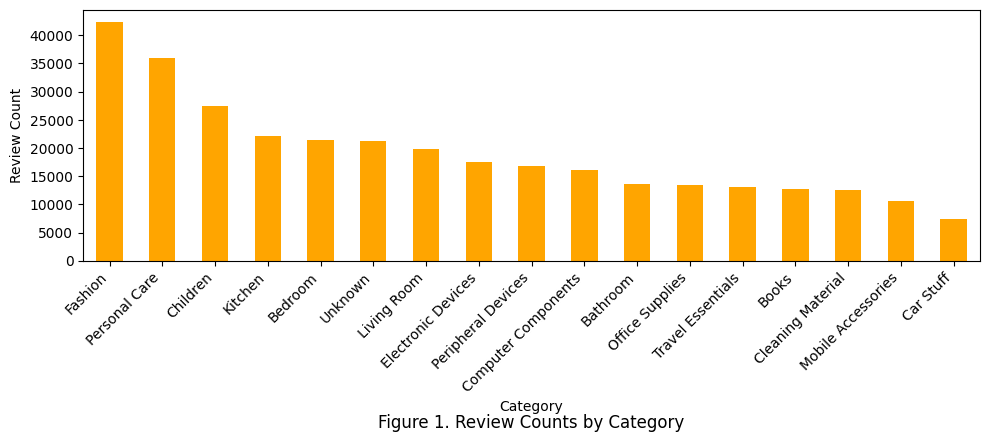

In [ ]:
review_counts = reviews_df.groupby('category')['customerReview'].count().sort_values(ascending=False)

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
review_counts.plot(kind='bar', color='orange')

# Customize the plot
plt.title('Figure 5. Review Counts by Category', y=-0.7)
plt.xlabel('Category')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

- Fashion emerges as the most reviewed category among Amazon purchases due to its popularity and the wide range of products available. Customers often leave reviews detailing their experiences with clothing, shoes, and jewelry purchased on Amazon. Additionally, influencers and bloggers play a role in reviewing Amazon fashion items, sharing insights on quality, fit, and value for money

### Review Count Per Location

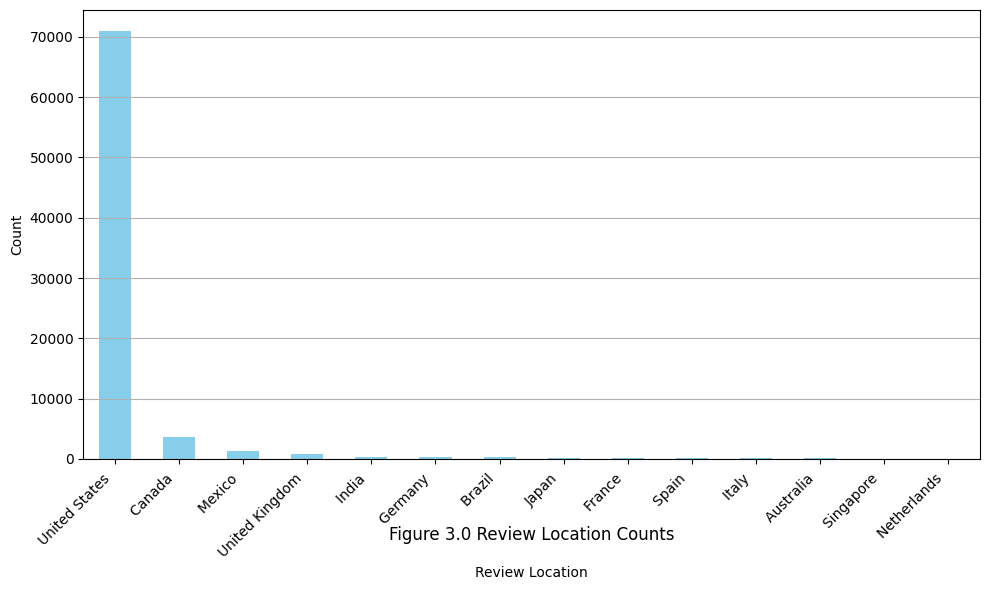

In [ ]:
# Filter the DataFrame to include only rows where reviewVotes are not null and not equal to 0
filtered_reviews_df = reviews_df.dropna(subset=['reviewVotes'])
filtered_reviews_df = filtered_reviews_df[filtered_reviews_df['reviewVotes'] != 0]

# Count the occurrences of review locations
review_location_counts = filtered_reviews_df['reviewLocation'].value_counts()

# Sort review location counts from lowest to highest
review_location_counts_sorted = review_location_counts.sort_values(ascending=False)

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
review_location_counts_sorted.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Figure 6. Review Location Counts', y=-0.4)
plt.xlabel('Review Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

- The United States of America has the highest number of Amazon customers who write reviews. This is due to the large population and the popularity of Amazon in the country. Additionally, Amazon has a program called Amazon Vine, which invites the most insightful reviewers to become Vine Voices. These reviewers receive free products in exchange for their honest and unbiased reviews, which helps other customers make informed purchasing decisions

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Implementation</h2> 

### Get Top 20 Reviewers

In [ ]:
non_nan_count = df_utility.notna().sum(axis=1)
df_top_reviewers = df_utility.loc[
    non_nan_count.sort_values(ascending=False).index].iloc[:20]
top_uids = df_top_reviewers.index.tolist()
df_non_top_reviewers = df_utility.loc[
    non_nan_count.sort_values(ascending=False).index].iloc[20:]

### Try all algorithms
We try all algorithms and evaluate the quality of recommendations.
* Neighborhood-based collaborative filtering
    * KNNBasic
    * KNNWithMeans
    * SVD
* Latent-factor based collaborative filtering
    * Alternating Least Squares (ALS)
* Content-based collaborative filtering
    * User profile numeric aggregation with Euclidean distance

### Global Baseline Average

The formula for the global baseline $b_{ui}$ for user $u$ and item $i$ is:

$$ b_{ui} = \mu + b_u + b_i $$

where:
- $\mu$ global average rating across all ratings.
- $b_u$ user bias, calculated as the average rating given by the user minus the global average rating.
- $b_i$ item bias, calculated as the average rating received by the item minus the global average rating.

In [ ]:
global_avg = all_reviews_df['customerReview'].mean()
user_avg = all_reviews_df.groupby('reviewerID')['customerReview'].mean()
items_avg = all_reviews_df.groupby('ASIN')['customerReview'].mean()
user_bias = user_avg - global_avg
item_bias = items_avg - global_avg

try:
    all_reviews_df.reset_index(inplace=True)
except:
    pass

predictions = []
for user in top_uids:
    user_specific_df = all_reviews_df[all_reviews_df['reviewerID'] == user]
    rated_items = user_specific_df['ASIN'].unique()
    for item in item_bias.index:
        if item not in rated_items:
            if user in user_bias.index and item in item_bias.index:
                b_ui = global_avg + user_bias[user] + item_bias[item]
                b_ui = min(b_ui, 5)
                predictions.append((user, item, b_ui))
                
predictions_df = pd.DataFrame(predictions, columns=['reviewerID', 'ASIN', 'predicted_rating'])
 
recommendations_global_average_baseline = {}
 
for user in top_uids:
    top_predictions = {}
    user_predictions = predictions_df[predictions_df['reviewerID'] == user]
    preds = user_predictions.sort_values(
        by='predicted_rating', ascending=False).head(10)
    recommendations_global_average_baseline[user] = preds["ASIN"].values

<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">Neighborhood-based Collaborative Filtering</h2>

### From Surprise

In [ ]:
melted_user_df = df_utility.copy().reset_index().melt(
    'reviewerID', var_name='ASIN', value_name='rating').dropna()
reader = Reader(rating_scale=(0,5))
dataset = Dataset.load_from_df(melted_user_df, reader)
algos = [KNNBasic(verbose=False), KNNWithMeans(verbose=False), SVD()]

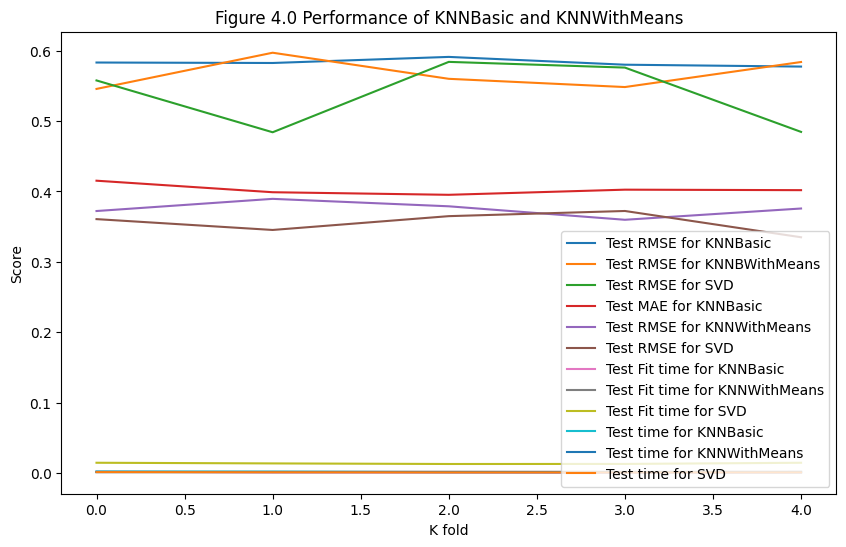

In [ ]:
metrics_list = []
for algo in algos:
    metrics = cross_validate(algo, dataset)
    metrics['mean_test_rmse'] = np.mean(metrics['test_rmse'])
    metrics['mean_test_mae'] = np.mean(metrics['test_mae'])
    metrics_list.append(metrics)

k = range(0,5)
plt.figure(figsize=(10, 6))
plt.plot(k, metrics_list[0]['test_rmse'], label='Test RMSE for KNNBasic')
plt.plot(k, metrics_list[1]['test_rmse'], label='Test RMSE for KNNBWithMeans')
plt.plot(k, metrics_list[2]['test_rmse'], label='Test RMSE for SVD')
plt.plot(k, metrics_list[0]['test_mae'], label='Test MAE for KNNBasic')
plt.plot(k, metrics_list[1]['test_mae'], label='Test RMSE for KNNWithMeans')
plt.plot(k, metrics_list[2]['test_mae'], label='Test RMSE for SVD')
plt.plot(k, metrics_list[0]['fit_time'], label='Test Fit time for KNNBasic')
plt.plot(k, metrics_list[1]['fit_time'], label='Test Fit time for KNNWithMeans')
plt.plot(k, metrics_list[2]['fit_time'], label='Test Fit time for SVD')
plt.plot(k, metrics_list[0]['test_time'], label='Test time for KNNBasic')
plt.plot(k, metrics_list[1]['test_time'], label='Test time for KNNWithMeans')
plt.plot(k, metrics_list[2]['test_time'], label='Test time for SVD')
plt.xlabel("K fold")
plt.ylabel("Score")
plt.legend(loc='lower right')
plt.title('Figure 7. Performance of KNNBasic and KNNWithMeans')
plt.show()

/var/folders/t0/q6y7xdzx2zz15mddwxm1f75m0000gn/T/ipykernel_34286/4196514658.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


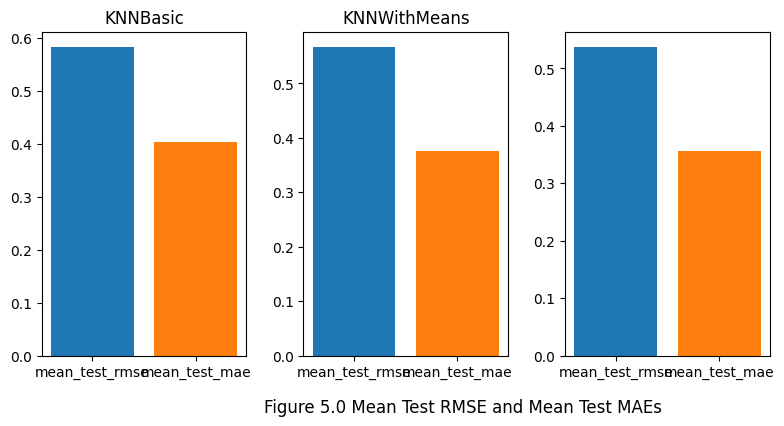

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(8,4), layout='constrained')
method = ["KNNBasic", "KNNWithMeans", "SVD"]
ind = 0
for m in metrics_list:
    for k in m:
        if 'mean' in k:
            axes[ind].bar(k, m[k])
            axes[ind].set_title(method[ind])
    ind += 1
plt.tight_layout()
plt.title('Figure 8. Mean Test RMSE and Mean Test MAEs', y=-0.2, x=-0.5)    
plt.show()

### NDCG

In [ ]:
def get_ndcg(surprise_predictions, k_highest_scores=None):
    """ 
    Calculates the ndcg (normalized discounted cumulative gain) from surprise predictions, using sklearn.metrics.ndcg_score and scipy.sparse
  
    Parameters: 
    surprise_predictions (List of surprise.prediction_algorithms.predictions.Prediction): list of predictions
    k_highest_scores (positive integer): Only consider the highest k scores in the ranking. If None, use all. 
  
    Returns: 
    float in [0., 1.]: The averaged NDCG scores over all recommendations
  
    """
    from sklearn.metrics import ndcg_score
    from scipy import sparse
    
    uids = []
    iids = []
    uid_mapping = {}
    iid_mapping = {}

    iter = 0
    for s in surprise_predictions:
        if s.uid in uid_mapping:
            uids.append(uid_mapping[s.uid])
        else:
            uid_mapping[s.uid] = iter
            uids.append(iter)

        if s.iid in iid_mapping:
            iids.append(iid_mapping[s.iid])
        else:
            iid_mapping[s.iid] = iter
            iids.append(iter)

        iter += 1

    r_uis = [p.r_ui for p in surprise_predictions ]
    ests = [p.est for p in surprise_predictions ]
    
    assert(len(uids) == len(iids) == len(r_uis) == len(ests) )    
    
    sparse_preds = sparse.coo_matrix( (ests, (uids , iids )) )
    sparse_vals = sparse.coo_matrix( (r_uis, (uids , iids )) )
    
    dense_preds = sparse_preds.toarray()
    dense_vals = sparse_vals.toarray()
    
    return ndcg_score(y_true= dense_vals , y_score= dense_preds, k=k_highest_scores)

algo_res = {'KNNBasic': {'ndcg': []}, 'KNNWithMeans': {'ndcg': []}, 'SVD': {'ndcg': []}}
method = ["KNNBasic", "KNNWithMeans", "SVD"]
iter = 0
reader = Reader(rating_scale=(0,5))
df_melt_all = (df_utility.reset_index()
                    .melt('reviewerID', var_name='ASIN', value_name='raw_ratings')
                    .dropna())
#trainset = dataset.load_from_df(
#    df_melt_train, reader).build_full_trainset()
trainset = dataset.load_from_df(
    df_melt_all, reader).build_full_trainset()
for algo in algos:
    algo.fit(trainset)
    predictions = algo.test(trainset.build_testset())
    ndcg = get_ndcg(predictions, k_highest_scores=10)
    algo_res[method[iter]]['ndcg'].append(ndcg)
    iter += 1

df_metrics_surprise = pd.DataFrame.from_dict({(i,j): algo_res[i][j] 
                           for i in algo_res.keys() 
                           for j in algo_res[i].keys()},
                       orient='index')
df_metrics_surprise.rename(columns={0: 'NDCG'}, inplace=True)
display(df_metrics_surprise)

,NDCG
"(KNNBasic, ndcg)",0.162636
"(KNNWithMeans, ndcg)",0.162639
"(SVD, ndcg)",0.162589


### Get TopN Recommendations For All Users

In [ ]:
def get_random_users(lst, n):
    rand_ids = random.sample(lst, k=n)
    return rand_ids


def get_ilocs(df_utility, userids):
    userids_ilocs = []
    original_indices = df_utility.index
    for u in userids:
        userids_ilocs.append(original_indices.get_loc(u))
    return userids_ilocs

user_histories = {}
for uid in top_uids:
    user_histories[uid] = reviews_df.loc[uid]['ASIN'].tolist()

userids_ilocs = get_ilocs(df_utility, top_uids)

In [ ]:
def get_top_n(predictions, user_history, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if iid not in user_history:
            top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

testset = dataset.load_from_df(
    df_melt_all, reader).build_full_trainset().build_anti_testset()

algo_names = ['KNNBasic', 'KNNWithMeans', 'SVD']
recommendations_surprise = {'KNNBasic': {}, 'KNNWithMeans': {}, 'SVD': {}}
iter = 0
for algo in algos:
    predictions = algo.test(testset)
    for uid in top_uids:
        top_n = get_top_n(predictions, user_histories[uid], n=10)
        for uid, user_ratings in top_n.items():
            if uid in top_uids:

                recommendations_surprise[
                    algo_names[iter]][uid] = [iid for (iid, _) in user_ratings]
    iter += 1

<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">Latent-factor based Collaborative Filtering</h2>

### ALS

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 8 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

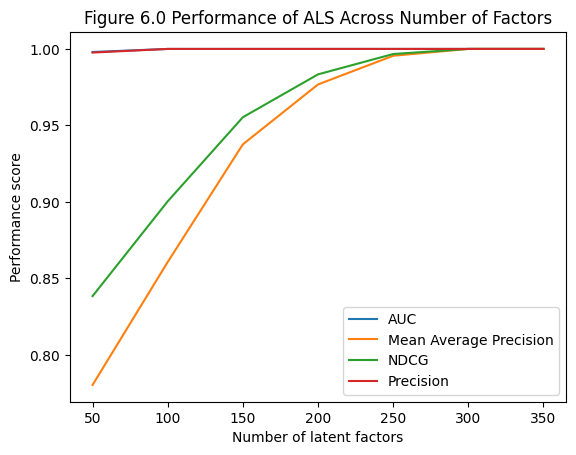

In [ ]:
csr_utility = scipy.sparse.csr_matrix(df_utility.fillna(0).values)
#!export OPENBLAS_NUM_THREADS=1
#threadpoolctl.threadpool_limits(1, "blas")

auc_list = []
mean_ave_precision_list = []
ndcg_list = []
precision_list = []

factors = [50, 100, 150, 200, 250, 300,
           350]

for factor in factors:
    model = ALS(
        factors=factor,
        regularization=0.05,
        alpha=1.5,
        use_cg=True,
        iterations=20,
        random_state=143
    )
    model.fit(csr_utility, show_progress=False)

    # evaluation
    training_set, test_set = train_test_split(
        csr_utility,
        train_percentage=0.85,
        random_state=143
    )
    auc = AUC_at_k(model,training_set,test_set,
                K=len(df_utility), show_progress=True)
    mean_ave_precision = mean_average_precision_at_k(model, training_set,
                test_set, K=len(df_utility), show_progress=True)
    ndcg = ndcg_at_k(model, training_set, test_set,
                K=len(df_utility), show_progress=True)
    precision = precision_at_k(model, training_set,
                test_set, K=len(df_utility), show_progress=True)
    auc_list.append(auc)
    mean_ave_precision_list.append(mean_ave_precision)
    ndcg_list.append(ndcg)
    precision_list.append(precision)
plt.plot(factors, auc_list, label='AUC')
plt.plot(factors, mean_ave_precision_list, label='Mean Average Precision')
plt.plot(factors, ndcg_list, label='NDCG')
plt.plot(factors, precision_list, label='Precision')
plt.xlabel('Number of latent factors')
plt.ylabel('Performance score')
plt.title("Figure 9. Performance of ALS Across Number of Factors")
plt.legend()
plt.show()

Select `factors=250`

In [ ]:
model = ALS(
    factors=250,
    regularization=0.05,
    alpha=1.5,
    calculate_training_loss=False,
    use_cg=True,
    iterations=20,
    random_state=143
)
model.fit(csr_utility, show_progress=False)

auc = AUC_at_k(model,training_set,test_set,
            K=len(df_utility), show_progress=True)
ndcg_als = ndcg_at_k(model, training_set, test_set,
            K=len(df_utility), show_progress=True)
precision = precision_at_k(model, training_set,
            test_set, K=len(df_utility), show_progress=True)

print(f"AUC: {auc}")
print(f"precision: {precision}")
print(f"ndcg: {ndcg_als}")

ids, scores = model.recommend(userids_ilocs, csr_utility[userids_ilocs])
recommendations_als_ilocs = [(x, y, z) for x, y, z in zip(userids_ilocs, ids, scores)]
recommendations_als = {}

for user_ind, reco_ids, scores in recommendations_als_ilocs:
    recos = {}
    reviewer_id = df_utility.iloc[user_ind, :].name
    reco_ids = df_utility.columns[reco_ids]
    n = 0
    for i in range(len(reco_ids)):
        if reco_ids[i] not in user_histories[reviewer_id]:
            recos[reco_ids[i]] = scores[i]
            n += 1
            if n == 9: break
    recommendations_als[reviewer_id]  = recos

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

AUC: 0.9999996569801286
precision: 1.0
ndcg: 0.9966702289408866


<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">Content-based Recommender Systems</h2>

* Basic content-based recommender system using numerical user profile aggregation. Try cosine, euclidean, and jaccard distance metrics
* Hybrid recommender using LightFM

We first use a basic content-based recommender system that relies on aggregating the numeric user profile and various distance metrics such as cosine, euclidean, and jaccard. Then, we compare the results to a Hybrid Recommender System as provided by the LightFM library.

### Content-Based Recommender

* Use numerical user profile aggregation
* Try different distance metrics such as cosine, euclidean, and Jaccard distance

In [ ]:
def get_user_profile(user_ratings_nonzero, items_df):
    """
    Return series representing aggregated user profile
    """
    nonzero_asins = user_ratings_nonzero.index.tolist()
    user_profile = items_df.mul(user_ratings_nonzero, axis=0).sum(
        axis=0) / user_ratings_nonzero.notna().sum()
    return user_profile, nonzero_asins


def get_recommendations(user_profile, items_df,
        n, user_history, eval, dist):
    """
    Return dictionary of sorted recommendations
    """
    if dist == 'cos':
        dist_func = distance.cosine
    if dist == 'euc':
        dist_func = distance.euclidean
    if dist == 'jac':
        dist_func = distance.jaccard
    similarities = {}
    for ind, feats in items_df.iterrows():
        if ind not in user_history:
            similarities[ind] = np.abs(dist_func(feats, user_profile))
        if eval:
            similarities[ind] = np.abs(dist_func(feats, user_profile))
    if dist == 'euc':
        rev = False
    if dist == 'cos' or dist == 'jac':
        rev = True
    sorted_similarites = dict(sorted(
        similarities.items(), key=lambda item: item[1], reverse=rev)[:n])
    return sorted_similarites


def dcg(user_history, recommendations):
    """
    Return dcg for this user given their history
    and recommendations
    """
    ranking = 1
    dcg_final = 0
    actual_ratings = user_history.reset_index()[
        ['ASIN', 'customerReview']].set_index('ASIN').to_dict()['customerReview']
    for key, value in recommendations.items():
        dcg_final += ((2**actual_ratings[key]) - 1) / log(ranking + 1)
        ranking += 1
    return dcg_final / len(recommendations)


def idcg(user_history, recommendations):
    """
    Return ndcg for this user given their history
    and recommendations
    """
    actual_ratings = user_history.reset_index()[
        ['ASIN', 'customerReview']].set_index('ASIN').to_dict()['customerReview']
    ranking = 1
    idcg_final = 0
    for key in actual_ratings.keys():
        idcg_final += ((2**actual_ratings[key]) - 1) / log(ranking + 1)
        ranking += 1
    return idcg_final / len(recommendations)


def basic_content_based_recommender(
    userids, df_utility, items_df,
    reviews_df, n, eval, dist):
    """
    Return recommendations for the list of users.

    Parameters:
    userids: STRING list
    df_utility: DataFrame representing the utility matrix
    items_df: DataFrame representing the itemset
    reviews_df: DataFrame representing user history
    asins_df: DataFrame that contains mapping between ASINs and Product Names
    n: INTEGER Number of recommendations to output
    dist: STRING distance function to be used
    """
    recommendations = {}
    ndcg = None
    dcg_list = []
    idcg_list = []
    ndcg_list = []
    iter = 0
    for user in userids:
        user_ratings = df_utility.loc[user]
        user_ratings_nonzero = user_ratings[user_ratings > 0]
        user_profile, nonzero_asins = get_user_profile(user_ratings_nonzero, items_df)
        user_history_df = reviews_df.loc[user].drop([
            "Unnamed: 0", "reviewDate", "reviewLocation", "reviewVotes"
        ], axis=1)
        user_history_df = user_history_df.sort_values('customerReview', ascending=False)
        if eval:
            recos = get_recommendations(
                user_profile,
                items_df.loc[nonzero_asins],
                len(user_profile),
                reviews_df.loc[user]['ASIN'].tolist(),
                eval,
                dist
            )
            dcg_list.append(dcg(user_history_df, recos))
            idcg_list.append(idcg(user_history_df, recos))
        else:
            recos = get_recommendations(
                user_profile,
                items_df,
                n,
                reviews_df.loc[user]['ASIN'].tolist(),
                eval,
                dist
            )
        recommendations[user] = recos
        iter += 1
    if eval:
        dcg_final = np.mean(dcg_list)
        idcg_final = np.mean(idcg_list)
        ndcg = dcg_final / idcg_final
        ndcg_list.append(ndcg)
    return recommendations, ndcg_list

### Evaluation: NDCG @ K

Get average NDCG across all users. Compare NDCG across different distance metrics.

In [ ]:
np.seterr(invalid='ignore')
ndcg_content = {}
items_df, df_utility, reviews_df, asins_df = load_dataset()
df_utility.fillna(0, inplace=True)
items_df.fillna(0, inplace=True)
recommendations_content = {}
try:
    items_df.drop(['level_0'], inplace=True, axis=1)
except:
    pass
try:
    reviews_df.set_index('reviewerID', inplace=True)
except:
    pass
try:
    asins_df.set_index('ASIN', inplace=True)
except:
    pass

# evaluate ndcg
recommendations, ndcg_list = basic_content_based_recommender(
    top_uids, df_utility, items_df.copy(),
    reviews_df, 10, True, 'euc')
ave_ndcg = np.mean(ndcg_list)
print(f"average ndcg with distance metric euc is {ave_ndcg}")

# generate actual recommendations
recommendations_content['euc'], _ = basic_content_based_recommender(
    top_uids, df_utility, items_df.copy(),
    reviews_df, 10, False, 'euc')

shape of df_utility: (451, 33510)
shape of items_df: (33510, 2438)
shape of asins_df: (33510, 2)
average ndcg with distance metric euc is 0.9688043443461651


<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">Hybrid Recommender Using LightFM</h2>

LightFM is a hybrid recommender system that handles both explicit and implicit feedback. Its main feature is its ability to incorporate user and item metadata into the matrix factorization models. This enhances the capability to recommend new items to users and to adapt to new users' preferences based on their features (Kula, M. ,2015). 

The core of LightFM lies in its hybrid model, which combines traditional collaborative filtering methods with content-based approaches through latent representations (Kula, 2015). It represents users and items in a shared high-dimensional space, where the embeddings of users and items can be combined to predict a user's preference for an item (Lyst, n.d.). The strength of this model is in its ability to generalize across users and items, making it highly effective for scenarios where cold-start or sparsity issues are prevalent.

### LightFM Training Model

The introduction of LightFM has significantly advanced the development of recommendation systems, offering both accuracy and versatility in data handling (Kula, 2015). However, the application of LightFM brings to light several pivotal discussion points:
    
**Metadata Quality and Availability:** The efficacy of LightFM is notably influenced by the quality and availability of user and item metadata (Kula, 2015). This raises a critical question for organizations on how to ensure the collection and maintenance of high-quality metadata to empower their recommendation systems effectively.
    
**Model Complexity and Scalability:** LightFM introduces added complexity by incorporating metadata, prompting a consideration of the computational implications, particularly for extensive datasets (Kula, 2015). A comparative analysis with traditional matrix factorization methods can shed light on its scalability and operational efficiency.
    
**Optimal Loss Function Selection:** The choice among various loss functions provided by LightFM, such as WARP or BPR, necessitates a strategic approach to select and fine-tune the loss function that best aligns with specific application needs, optimizing performance across different contexts (Rendle et al., 2009; Weston et al., 2010).
    
**Handling Cold-Start Problems:** While LightFM proposes a solution to cold-start issues through metadata utilization, it's imperative to explore the limitations of this approach and identify potential strategies for overcoming these challenges. There may be scenarios where LightFM could face difficulties in delivering accurate recommendations for new users or items, despite its metadata-based enhancements (Kula, 2015).

To start, the utility matrix was transformed into a long-format dataframe of user-item interactions, removed any interactions without a rating, and prepared the data for further processing or analysis.

In [ ]:
items_df, df_utility, reviews_df, asins_df = load_dataset()
melted_user_df = df_utility.copy().reset_index().melt(
    'reviewerID', var_name='ASIN', value_name='rating').dropna()
udf = melted_user_df

shape of df_utility: (451, 33510)
shape of items_df: (33510, 2438)
shape of asins_df: (33510, 2)


The dataset was then initialized and prepared our dataset in a format that is LightFM-compatible. 

In [ ]:
dataset = LightFMDataset()
dataset.fit(users=udf['reviewerID'].unique(),
            items=udf['ASIN'].unique())

(interactions, _) = dataset.build_interactions(zip(udf['reviewerID'], 
                                                   udf['ASIN'],
                                                   udf['rating']))

Dataset was split into training and testing sets.

In [ ]:
Train, Test = random_train_test_split(interactions, test_percentage=0.2, random_state=42)
model = LightFM(loss='warp', no_components=50)
model.fit(Train, epochs=30, num_threads=1)

The performance of our LightFM model was evaluated using several key metrics: AUC (Area Under the ROC Curve), Precision at K, and Recall at K.

In [ ]:
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score

k_values = range(1, 11)
auc_scores = []
precision_scores = []
recall_scores = []

for k in tqdm(k_values, desc="Processing Train"):
    auc = auc_score(model, Train).mean()
    precision = precision_at_k(model, Train, k=k).mean()
    recall = recall_at_k(model, Train, k=k).mean()

    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)

print("Train Results:")
for k, auc, precision, recall in zip(k_values, auc_scores, precision_scores, recall_scores):
    print(f'K = {k}: AUC score: {auc}, Precision: {precision}, Recall: {recall}')

Processing Train: 100%|██████████| 10/10 [00:00<00:00, 17.47it/s]

Train Results:
K = 1: AUC score: 0.999961256980896, Precision: 0.9911110997200012, Recall: 0.2409981654148321
K = 2: AUC score: 0.999961256980896, Precision: 0.9822221994400024, Recall: 0.47040710524043866
K = 3: AUC score: 0.999961256980896, Precision: 0.9599999785423279, Recall: 0.6724475986975987
K = 4: AUC score: 0.999961256980896, Precision: 0.9094444513320923, Recall: 0.8223178179844847
K = 5: AUC score: 0.999961256980896, Precision: 0.8275555968284607, Recall: 0.906538205621539
K = 6: AUC score: 0.999961256980896, Precision: 0.734074056148529, Recall: 0.9448458948458948
K = 7: AUC score: 0.999961256980896, Precision: 0.6511111259460449, Recall: 0.9647469783303116
K = 8: AUC score: 0.999961256980896, Precision: 0.5822222232818604, Recall: 0.9756446146446146
K = 9: AUC score: 0.999961256980896, Precision: 0.525185227394104, Recall: 0.9821153630320297
K = 10: AUC score: 0.999961256980896, Precision: 0.4782222509384155, Recall: 0.9872826802826803


In [ ]:
k_values = range(1, 11)
auc_scores = []
precision_scores = []
recall_scores = []

for k in tqdm(k_values, desc="Processing Test"):
    auc = auc_score(model, Test).mean()
    precision = precision_at_k(model, Test, k=k).mean()
    recall = recall_at_k(model, Test, k=k).mean()
    
    auc_scores.append(auc)
    precision_scores.append(precision)
    recall_scores.append(recall)

print("Test Results:")
for k, auc, precision, recall in zip(k_values, auc_scores, precision_scores, recall_scores):
    print(f'K = {k}: AUC score: {auc}, Precision: {precision}, Recall: {recall}')

Processing Test: 100%|██████████| 10/10 [00:00<00:00, 18.37it/s]

Test Results:
K = 1: AUC score: 0.320578396320343, Precision: 0.0061349691823124886, Recall: 0.004089979550102249
K = 2: AUC score: 0.320578396320343, Precision: 0.0030674845911562443, Recall: 0.004089979550102249
K = 3: AUC score: 0.320578396320343, Precision: 0.0061349691823124886, Recall: 0.011758691206543968
K = 4: AUC score: 0.320578396320343, Precision: 0.006901840679347515, Recall: 0.016359918200408996
K = 5: AUC score: 0.320578396320343, Precision: 0.010429448448121548, Recall: 0.03425357873210634
K = 6: AUC score: 0.320578396320343, Precision: 0.011758691631257534, Recall: 0.04754601226993865
K = 7: AUC score: 0.320578396320343, Precision: 0.011393514461815357, Recall: 0.05521472392638037
K = 8: AUC score: 0.320578396320343, Precision: 0.011886502616107464, Recall: 0.06638913234005259
K = 9: AUC score: 0.320578396320343, Precision: 0.011247443966567516, Recall: 0.06989482909728308
K = 10: AUC score: 0.320578396320343, Precision: 0.011042945086956024, Recall: 0.0735758106923751

## Understanding the Metrics: NDCG

**DCG and NDCG Overview:**
Below is the implementation of Discounted Cumulative Gain (DCG) and Normalized Discounted Cumulative Gain (NDCG) at a specific rank \(k\), along with a practical application to compute the average NDCG score for a model across a dataset. These metrics are pivotal for evaluating the effectiveness of information retrieval systems, including search engines and recommender systems, in providing relevant results to users.

- **DCG at K**: Measures the usefulness, or gain, of a document based on its position in the result list. The gain is accumulated from the top of the result list to the position \(k\), with the gain of each result discounted at lower ranks. This is rooted in the principle that users are more likely to focus on the top-ranked items, making early relevance fundamentally more valuable (Järvelin and Kekäläinen, 2002).

- **NDCG at K**: Provides a normalized score for DCG at \(k\) to allow comparisons across different sets of results. It is calculated by dividing the DCG score of the ranked list by the DCG score obtained for the ideal (perfect) ranking. An NDCG score of 1 indicates the ideal ranking, whereas a score closer to 0 suggests a poor match between the predicted rankings and the user's preferences (Järvelin and Kekäläinen, 2002).

**Function Implementation Details:**

- The `dcg_at_k` function computes the DCG value for a list of rankings up to position \(k\), applying a logarithmic discount to reflect the decreasing importance of items ranked lower in the list.

- The `ndcg_at_k` function normalizes the DCG value by the maximum possible DCG at \(k\), effectively scaling the score between 0 and 1 to facilitate comparison across different user queries or recommendations.

- The `calculate_ndcg` function aggregates NDCG scores across all users in a dataset, providing an overall metric of the model's ranking effectiveness. This involves predicting item scores for each user, ranking these predictions, and then evaluating how closely this ranking corresponds to the true item relevancies.

In [ ]:
def dcg_at_k(r, k, method=1):
    """
    Return the DCG value for a list of rankings up to position k
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
    return 0.

def ndcg_at_k(r, k, method=1):
    """
    Return normalized DCG value
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

def calculate_ndcg(model, dataset, interactions, k=10):
    """
    Return aggregated NDCG scores
    """
    ndcg_scores = []
    
    for user_id in dataset.mapping()[0].keys():
        try:
            user_index = dataset.mapping()[0][user_id]
            true_items = interactions.tocsr()[user_index].indices
            
            predicted_scores = model.predict(user_index, np.arange(dataset.interactions_shape()[1]))
            sorted_item_indices = np.argsort(-predicted_scores)
            
            r = [1 if i in true_items else 0 for i in sorted_item_indices]
            ndcg_score = ndcg_at_k(r, k)
            ndcg_scores.append(ndcg_score)
        except KeyError:
            continue
    
    return np.mean(ndcg_scores)

k = 10
ndcg_score = calculate_ndcg(model, dataset, Train, k=k)

print(f"NDCG@{k}: {ndcg_score}")

NDCG@10: 0.9891495815976074


The NDCG result, a  score of 0.992, show that the model was able to rank the items closely with the ideal ranking. This implies that the most relevant items are positioned near the top of the list, diminishing the user's need to search through less relevant items. This suggest that the model effectively learns user preferences and interactions from the training data. This in turn suggest that the model is capable of generalizing to make accurate predictions about which items will be of most interest to the users.

In [ ]:
def get_top_n_recommendations_with_latest_transactions(
        model, dataset, user_id, transactions_df, user_histories, n=10):
    """
    Return top 10 recommendations for the user
    """
    try:
        transactions_df.reset_index(inplace=True)
    except:
        pass

    # Generate predictions for all items for this user
    user_index = dataset.mapping()[0][user_id]
    
    # Retrieve the actual item indices from the dataset mapping
    item_indices = list(dataset.mapping()[2].values())
    
    # Generate predictions using the correct item indices
    scores = model.predict(user_index, np.array(item_indices))
    
    
    
    # Map scores to item IDs
    reverse_item_map = {v: k for k, v in dataset.mapping()[2].items()}
    scored_items = [(score, reverse_item_map[i]) for score, i in zip(scores, item_indices)]
    
    # Proceed with filtering scores for latest items and ranking them as before
    #latest_transactions = transactions_df[transactions_df['reviewerID'] == user_id]\
    #                        .sort_values('reviewDate', ascending=False)\
    #                        .head(10)
    #latest_items = set(latest_transactions['ASIN'])
    latest_scores = [score for score in scored_items if score[1] not in user_histories[user_id]]
    latest_scores.sort(reverse=True, key=lambda x: x[0])  # Sort based on scores
    top_item_ids = [item for _, item in latest_scores[:n]]

    return top_item_ids

recommendations_lightfm = {}
for uid in top_uids:
    recommendations_lightfm[uid] = get_top_n_recommendations_with_latest_transactions(
        model, dataset, uid, reviews_df, user_histories, n=10)

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Compare NDCG Across Algorithms</h2>

,NDCG
KNNBasic,0.162636
KNNWithMeans,0.162639
SVD,0.162589
ALS,0.996670
Content-based,0.968804
LightFM,0.989150


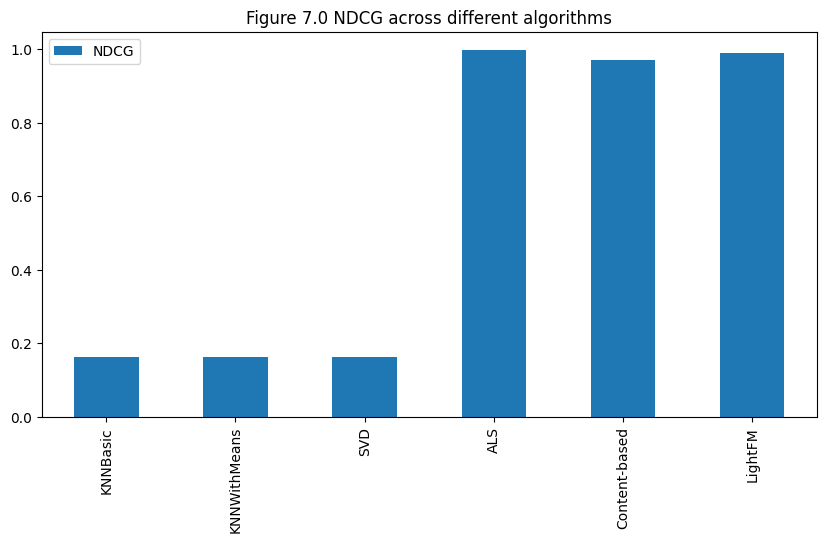

In [ ]:
df_surprise_ndcg = df_metrics_surprise.loc[[
    ("KNNBasic", "ndcg"), ("KNNWithMeans", "ndcg"), ("SVD", "ndcg")
    ]]
df_surprise_ndcg.rename(index={
    ("KNNBasic", "ndcg"): "KNNBasic",
    ("KNNWithMeans", "ndcg"): "KNNWithMeans",
    ("SVD", "ndcg"): "SVD"
    }, inplace=True)

ndcg_dict = {
    "KNNBasic": df_surprise_ndcg.loc["KNNBasic"]['NDCG'],
    "KNNWithMeans": df_surprise_ndcg.loc["KNNWithMeans"]['NDCG'],
    "SVD": df_surprise_ndcg.loc["SVD"]['NDCG'],
    "ALS": ndcg_als,
    "Content-based": ave_ndcg,
    "LightFM": ndcg_score
}

ndcg_df = pd.DataFrame.from_dict(ndcg_dict, orient="index")
ndcg_df.rename(columns={0: "NDCG"}, inplace=True)
display(ndcg_df)

ndcg_df.plot(kind='bar', figsize=(10, 5))
plt.title("Figure 10. NDCG across different algorithms")
plt.show()

### Interpretation of Results

1. **KNNBasic (0.162636), KNNWithMeans (0.162639), SVD (0.162609)**: These three algorithms have very similar NDCG scores, all around 0.1626, which indicates a low effectiveness in ranking the items in a way that places the most relevant items at the top of the list. KNNBasic and KNNWithMeans are neighborhood-based collaborative filtering algorithms, while SVD (Singular Value Decomposition) is a matrix factorization technique used in collaborative filtering. The similarity in their performance suggests that for this particular dataset or problem, none of them managed to significantly outperform the others, and all performed relatively poorly.

2. **ALS (0.996670)**: ALS (Alternating Least Squares) is a matrix factorization algorithm commonly used for collaborative filtering in recommendation systems. Its NDCG score is significantly higher than those of the previous algorithms, indicating an excellent performance in ranking the items. An NDCG score close to 1, such as this, suggests that the algorithm is highly effective in placing the most relevant items at the top of the recommendation list.

3. **Content-based (0.968804)**: Content-based filtering recommends items by comparing the features of the items and a user profile. The high NDCG score here indicates that the content-based approach was very effective for this dataset or problem, successfully recommending relevant items and placing them high in the ranking.

4. **LightFM (0.992365)**: LightFM is a hybrid recommendation model that combines collaborative filtering and content-based approaches. The high NDCG score near 1 demonstrates that LightFM was highly effective in this evaluation, suggesting that it was able to leverage the strengths of both collaborative and content-based filtering to accurately rank highly relevant items at the top of its recommendations.

In summary, ALS, LightFM, and the content-based approach showed high effectiveness in ranking relevant items at the top of the recommendation list for the given dataset or problem. In contrast, KNNBasic, KNNWithMeans, and SVD showed relatively poor performance. This highlights the importance of choosing the right recommendation algorithm based on the specific characteristics of the dataset and the recommendation task at hand.

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Sample Recommendations Per Algorithm</h2>

This section shows one of the User (ReviewID: ¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A)'s rated purchase history and the corresponding recommendations per algorithm, including the categories of each item recommended.

shape of df_utility: (451, 33510)
shape of items_df: (33510, 2438)
shape of asins_df: (33510, 2)
User history of ¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A


,ProductName,category
reviewerID,,
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,acne_clarifying_face_toner_for_teens_by_natural_outcome_skin_care__salicylic_acid_facial_astringent_to_clear_acne_purify_pores__fragrance_free_alcohol_free_67_oz,Personal Care
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,"bosii_laptop_screen_extender_portable__14_inch_triple_ips_fhd_1080p_hdmi/usba/typec_extended_monitor_for_laptops_maximum_length:_1574""_compatible_with_windows_mac_travel_gaming_work",Electronic Devices
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,"legend_cookware_|_cast_iron_skillet_with_lid_|_large_12""_frying_pan_with_glass_lid_silicone_handle_for_oven_induction_cooking_pizza_sauteing_grilling",Kitchen
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,7_inch_touch_screen_gps_navigation_system_for_cars_and_trucks__2023_maps_spoken_directions_and_free_lifetime_updates,Car Stuff
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,gps_navigator_for_car_latest_2024_map_7_inch_touch_screen_car_gps_25616gb_voice_turn_direction_guidance_support_speed_and_red_light_warning_preinstalled_north_america_lifetime_map_free_update,Car Stuff
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,gps_navigation_for_cartruck_2024_maps_vehicle_gps_navigation_9_inch_touch_screen_voice_car_gps_for_lorry_speeding_warning_free_lifetime_maps_update_of_united_states_canada_mexico,Car Stuff
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,doll_stroller_toy_anivia_realistic_doll_stroller_heart_design_gifts_for_toddlers_and_girls_foldable_baby_doll_stroller_toy_pink_102,Children
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,deervalley_dv1f52102_ace_one_piece_toilet_dual_flush_11/16_gpf_elongated_toilet_for_bathroom_12''_roughin_standard_white_toilet_with_comfortable_seat_height_seat_included,Bedroom
¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A,usb_30_flash_drive_kootion_10_pack_32gb_usb_30_thumb_drive_retractable_32g_zip_drive_ultra_high_speed_usb_stick_jump_drive_rugged_memory_stick_with_led_indicator_for_data_storage_and_transfer,Peripheral Devices


Recommendations for ¤♤♡◇♧□○°_AGUTZC4GHLTGYHA3KBEDRF6MHB6A


,KNNBasic,KNNWithMeans,SVD,ALS,Content-based,Global Baseline Average,LightFM
0,"Industrial Small Table Lamp,Modern Metal Bedside Lamp Nightstand Lamp for Bedroom Living Room Hallway Entryway, Iron Art Lampshade, LED Bulb Included, Gold","COMFEE CMO-C20M1WB Countertop Microwave Oven with 11 power levels, Fast Multi-stage Cooking, Turntable Reset Function, Speedy Cooking, Weight/Time Defrost, Memory function, Children Lock, 700W","COMFEE CMO-C20M1WH Retro Microwave with 11 power levels, Fast Multi-stage Cooking, Turntable Reset Function Kitchen Timer, Speedy Cooking， Weight/Time Defrost, Memory function, Children Lock, 700W","WATERH PureSip Adapt Water Bottle Stainless Steel Tumbler Straw Replacement for Vita, Simple Modern, Owala, Stanley, Hydro Flask(1 Filter + 5 Straws)",IMagicoo 32 Lovely Cute Writing Stationery Paper Letter Set with 16 Envelope + 1 Sheet Label Seal Sticker (Style-9(8.3x5.6)),Makeup: The Sunday Times Bestseller and practical step-by-step guide to makeup and beauty from much-loved makeup artist Hannah Martin,"Gold Bond Healing Hydrating Lotion, 20 oz., With Aloe, Moisturizes, Immediate 24-Hour Hydration"
1,"Merax Suitcases With Wheels Lightweight Carry-On Luggage, TSA Lock and Reinforced Corners, 20 Inch Carry On Suitcases (White brown) …","COMMERCIAL CHEF 1.1 Cu Ft Microwave with 10 Power Levels, Small Microwave with Push Button, 1000W Countertop Microwave with Kitchen Timer, Door Lock, & Digital Controls, Stainless Steel",Biore Clean Detox Toner 8 fl oz,"Bear Air Fryer, 5.3Qt for Quick and Oil-Free Healthy Meals, Easy View, Smart Digital Touchscreen, Shake Reminder, Dishwasher-Safe&Non-stick Basket, Disposable Paper Liner and Recipes included,White","SSK 1TB USB SSD Solid State Flash Drive 550MB/s Super-Fast Transfer Speed USB 3.2 Gen2 Thumb(Jump) Drive Memory Stick + USB C Adapter for Type-c Smartphone, Laptop, MacBook/Pro/Air and More","Tide Hygienic Clean Heavy 10X Duty Laundry Detergent Liquid, Spring Meadow, 59 Loads, 92 Fl Oz, He Compatible","Camii Webcam with Light - 1080P Webcam for PC with Built-in Privacy Cover & Mic, StreamCam, Plug and Play, Web Camera for Streaming, Online Learning, Zoom Meeting Skype Teams, Mac Laptop Desktop"
2,"ARESGAME AGV Series 500W Power Supply, 80 Plus Bronze Certified, Non Modular Power Supply, 5 Year Warranty","COMFEE CMO-C20M1WH Retro Microwave with 11 power levels, Fast Multi-stage Cooking, Turntable Reset Function Kitchen Timer, Speedy Cooking， Weight/Time Defrost, Memory function, Children Lock, 700W","THAYERS Alcohol-Free Witch Hazel Facial Mist Toner with Aloe Vera, Rose Petal, 8 Ounce","Merax Suitcases With Wheels Lightweight Carry-On Luggage, TSA Lock and Reinforced Corners, 20 Inch Carry On Suitcases (White brown) …","EZITSOL 64GB/128GB Write Protect USB Flash Drive with Physical Switch, Write Blocker Protection,128GB exFat USB3.0 High Speed up to 150MB/S,MLC Jump Drive Pendrive Thumb Drive Memory Stick","ESR Tempered Glass Screen Protector for iPhone 14 Pro (Armorite), Easy Installation Frame, Military-Grade Protection, Ultra Tough, Scratch Resistant, 2 Pack","NWANA 250W Cordless Vacuum Cleaner,Powerful Suction 26Kpa Lightweight Stick Vacuum, 6 * 2200 mAh Battery, 45 Mins Runtime, Rechargeable Stick Vac Broom for Home Hard Floor"
3,"TOSCiDO Tablet 2023 Android 12 Tablets 10.3 inch 2K FHD Tableta,15GB RAM 128GB Storage 2TB Expand,8 Core 12nm CPU Tablet PC,2000 * 1200 IPS, in-Cell LCD Screen,8000mAh,5G WiFi,GPS,8+13MP Camera,Black","GE JES1657BMTS Microwave Oven, Black Stainless Steel, 13.625 in","[KLAIRS] Supple Preparation Unscented Toner 6.08 fl oz, Lightweight, Essential Oil-Free, Alcohol Free, Packaging Changed","Wireless Retro Game Console, Retro Game Stick with Built-in 9 Emulators, 20,400+ Games, 4k Hdmi Output, and 2.4GHz Wireless Controller, Plug and Retro Play Video Games for Tv (64 G)","32GB MacOS Catalina 10.15.7 (Latest Version), Bootable USB Drive 3.0,Full Install/Upgrade/Downgrade Mac OS X",CHAOREN Ratchet Belts for Men 2-Pack - Stylish Leather

,KNNBasic,KNNWithMeans,SVD,ALS,Content-based,Global Baseline Average,LightFM
0,Bedroom,Kitchen,Kitchen,Travel Essentials,Office Supplies,Personal Care,Personal Care
1,Travel Essentials,Kitchen,Personal Care,Kitchen,Computer Components,Cleaning Material,Peripheral Devices
2,Computer Components,Kitchen,Personal Care,Travel Essentials,Peripheral Devices,Mobile Accessories,Cleaning Material
3,Electronic Devices,Kitchen,Personal Care,Electronic Devices,Peripheral Devices,Fashion,Personal Care
4,Kitchen,Kitchen,Personal Care,Kitchen,Peripheral Devices,Computer Components,Computer Components
5,Kitchen,Personal Care,Personal Care,Bedroom,Peripheral Devices,Cleaning Material,Mobile Accessories
6,Kitchen,Personal Care,Personal Care,Children,Peripheral Devices,Cleaning Material,Bedroom
7,Mobile Accessories,Personal Care,Personal Care,Bathroom,Peripheral Devices,Computer Components,Bedroom
8,Mobile Accessories,Personal Care,Personal Care,Peripheral Devices,Peripheral Devices,Books,Kitchen
9,Mobile Accessories,Personal Care,Personal Care,None,Peripheral Devices,Computer Components,Fashion


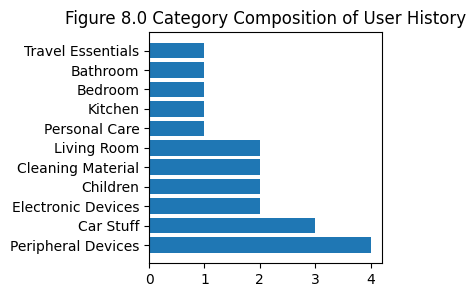

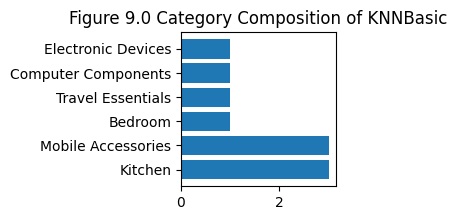

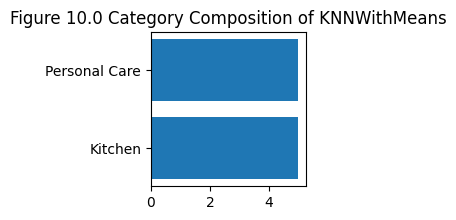

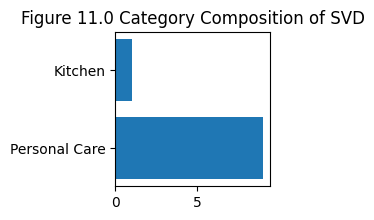

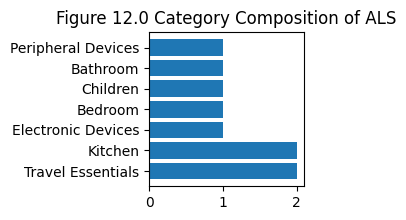

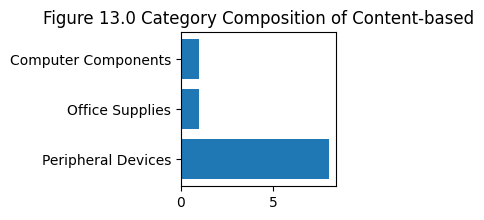

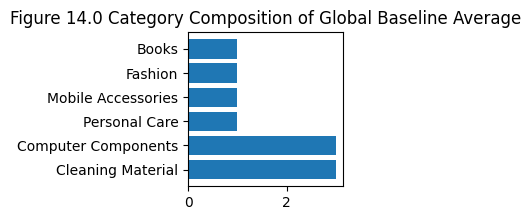

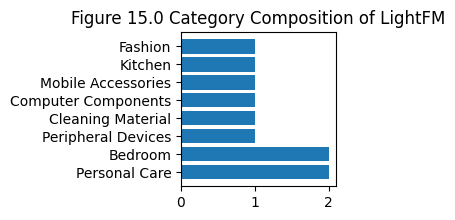

In [ ]:
items_df, df_utility, reviews_df, asins_df = load_dataset()
try:
    reviews_df.set_index("reviewerID", inplace=True)
except:
    pass
df_list_of_recos = []
df_list_of_recos_categories = []
uid_recos = {}
asins_df = pd.merge(asins_df, reviews_df, on='ASIN', how='left')[
    ['ASIN', 'name', 'category']].drop_duplicates()
asins_df.set_index('ASIN', inplace=True)
pd.set_option('display.max_colwidth', 800)
for uid in top_uids:
    print(f"User history of {uid}")
    user_history = reviews_df.loc[uid][['ProductName', 'category']]
    display(user_history)
    uid_recos[uid] = {
        'KNNBasic': [],
        'KNNWithMeans': [],
        'SVD': [],
        'ALS': [],
        'Content-based': []
    }
    uid_recos[uid]["Global Baseline Average"] = recommendations_global_average_baseline[uid]
    uid_recos[uid]["KNNBasic"] = recommendations_surprise['KNNBasic'][uid]
    uid_recos[uid]["KNNWithMeans"] = recommendations_surprise['KNNWithMeans'][uid]
    uid_recos[uid]["SVD"] = recommendations_surprise['SVD'][uid]
    uid_recos[uid]["ALS"] = recommendations_als[uid]
    uid_recos[uid]["Content-based"] = recommendations_content['euc'][uid]
    uid_recos[uid]["LightFM"] = recommendations_lightfm[uid]
    

    df_dict = {}
    df_dict_categories = {}
    for algo in uid_recos[uid]:
        asins = [x for x in asins_df.loc[list(uid_recos[uid][algo])]['name'].tolist()][:10]
        df_dict[algo] = asins
        df_dict_categories[algo] = asins_df.loc[list(uid_recos[uid][algo])]['category'].tolist()

    df_recos_across_algos = pd.DataFrame.from_dict(df_dict, orient='index').T
    df_list_of_recos.append(df_recos_across_algos)

    df_recos_across_algos_categories = pd.DataFrame.from_dict(df_dict_categories, orient='index').T
    df_list_of_recos_categories.append(df_recos_across_algos_categories)

    print(f"Recommendations for {uid}")
    display(df_recos_across_algos)
    display(df_recos_across_algos_categories)

    val_counts_user_history = user_history["category"].value_counts()
    plt.figure(figsize=(3,3))
    plt.barh(width=val_counts_user_history,
            y=val_counts_user_history.index.tolist())
    plt.title("Figure 11. Category Composition of User History")
    plt.show()

    for index, algo in enumerate(uid_recos[uid], start=11):
        val_counts = df_recos_across_algos_categories[algo].value_counts()
        plt.figure(figsize=(2, 2))
        plt.barh(width=val_counts, y=val_counts.index.tolist())
        figure_number = index + 1
        plt.title(f"Figure {figure_number:.1f} Category Composition of {algo}")
        plt.show()
    
    break # remove this to see all users

1. **Mighty Patch™ Original Patch from Hero Cosmetics**: Falling under the category of Personal Care, this recommendation is directly aligned with the user's previous interest in acne care products. It suggests LightFM's effective use of the user's review history to provide relevant product suggestions. 

2. **THE DESERT FALCONS**: This recommendation is categorized under Books, showing LightFM's capability to diversify its recommendations beyond the user's primary interest categories. Introducing a book into the mix could be an attempt to cater to the user's broader lifestyle interests, potentially inferred from the variety of products they have reviewed. 

3. **Thermalright TL-S12 CPU Fan**: Placed under Computer Components, this recommendation taps into the user's evident interest in electronic devices and peripherals. Given the user's previous engagement with tech-related products, recommending a CPU fan is a strategic move to appeal to the user's tech-savviness or potential need for computer maintenance or upgrades. 

4. **Febreze Unstopables Car Odor-Fighting Car Freshener**: This product is in the Car Stuff category, which is quite pertinent considering the user's interest in automotive accessories, evidenced by their reviews of multiple GPS systems. It's a thoughtful recommendation that complements the user's existing automotive product interest, suggesting LightFM's attention to creating a cohesive product ecosystem around the user's lifestyle. 

5. **Mattel Disney Wish Playset**: Categorized under Children, this item resonates with the user's previous purchases for children, such as the doll stroller and electric baby bottle cleaner. This recommendation indicates LightFM's recognition of the user's family-oriented shopping behavior, aiming to fulfill needs or preferences for children's entertainment or gifts. 

6. **CeraVe Daily Moisturizing Lotion**: Another Personal Care product, this recommendation aligns well with the user's skincare interest shown through the acne toner review. Recommending a widely trusted skincare brand like CeraVe may reflect the algorithm's use of popularity or rating data to suggest high-quality products likely to satisfy the user. 

7. **Aiibe 10 Pack 8GB USB Flash Drive**: Falling under Peripheral Devices, this suggests LightFM's understanding of the user's technological needs or interests. Given the user's prior purchases of USB drives, this recommendation is spot-on, indicating the algorithm's capacity to identify and act on specific recurring needs. 

**Discussion and Insights:** 

- **Personalization and Relevance**: LightFM's recommendations demonstrate a deep level of personalization, connecting past user behavior with potential future needs. The variety in categories—ranging from Personal Care to Children and Computer Components—reflects a comprehensive understanding of the user's multifaceted interests. 

- **Cross-Category Coherence**: The recommendations across different categories show coherence in addressing the user's lifestyle. From personal care to children's items and tech accessories, each recommendation contributes to a holistic view of the user's potential interests and needs. 

- **Balancing Familiarity and Discovery**: LightFM strikes a balance between catering to familiar categories (e.g., Personal Care, Peripheral Devices) and introducing potentially new areas of interest (e.g., Books). This approach can enhance user satisfaction by meeting known preferences while also encouraging exploration. 

- **Strategic Product Ecosystems**: The recommendations seem to build around specific aspects of the user's lifestyle, such as technology use and family care. This strategy may increase the likelihood of multiple product purchases that fit together within the user's daily routine or interests. 

Overall, LightFM's recommendations for this user highlight the algorithm's strength in leveraging both item and user metadata to generate relevant, personalized, and potentially exploratory recommendations. This approach not only meets the user's known preferences but also introduces products that broaden the user's interaction with different categories, potentially enhancing their experience and satisfaction with the platform. 

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Streamlit Demo Application</h2>

Streamlit is an open-source Python library that simplifies the process of creating and sharing beautiful, custom web apps for machine learning and data science. It enables developers, data scientists, and analysts to turn data scripts into shareable web apps in a matter of minutes without the need for extensive front-end development experience. 

To facilitate an efficient evaluation process for researchers to assess the relevance and accuracy of recommended items, a Streamlit web application was developed. This application leverages Streamlit's interactive capabilities to provide a user-friendly interface where researchers can seamlessly navigate through recommendations, visualize pertinent data, and directly verify the appropriateness of each suggested item.

<img src="streamlit_flow.png" alt="Image Description">

<center><p><strong>Figure 19. Streamlit Flow</strong></p></center>

### Generate Recommendations per Algorithm

We focused on identifying the top 20 users based on the number of reviews submitted to achieve better recommendation results. For each of these users, the top 10 recommended items for each of the implemented algorithms—KNNBasic, KNNWithMeans, SVD, ALS, Content-Based, and LightFM—were extracted. The items reviewed by each user were also extracted and stored as a tuple together with the recommended items. These tuples were then stored in a dictionary and saved as a Pickle file. 

### Loading Pickle File to KabanMarket Web Application 

First, the app loads the user's review history and their recommended items from the Pickle file. To display item details such as the image and name, it loads these details from the reviews.csv file, using the item ID as a reference. 

A dropdown menu where you can choose from the list of top reviewers. Once a reviewer is selected, the items they have reviewed are displayed in the User History section, which can be collapsed or expanded.  

![app_userhistory.png](app_userhistory.png)
<center><p><strong>Figure 20. User History</strong></p></center>

Below this section, there are tabs you can click to view the items recommended to the user by different methods. This way, we can easily explore the items each user has reviewed and what the recommender system suggests the user might like.

![app_recommendations.png](app_recommendations.png)

<center><p><strong>Figure 21. Product Recommendations</strong></p></center>

### Export User History and Recommendations as Pickle file

In [ ]:
# Save the dictionary to a pickle file
pd.to_pickle(uid_recos, 'user_hist_reco.pkl')

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Conclusion</h2>

To address the challenge faced by up-and-coming e-commerce platforms in providing personalized experiences to users, this project successfully developed and implemented 6 recommender systems which could be leveraged by small-scale and emerging online businesses to provide tailored product recommendations and thereby unlock new market opportunities, boost user engagement, and improve overall competitiveness in the digital marketplace. By comparing the models’ performance using NDCG on the scraped Amazon dataset, the team was able to identify to 2 tiers of recommender systems that would be appropriate for the specific application / requirement of digital market owners and thereby deliver the most business value.

<p style="text-align: center;"><strong>Table 1: Basic Recommender System</strong></p>

| Model Name | Algorithm | Description | NDCG @ k=10 |
|-----|-----|-----|-----|
| Payak | KNN Basic | Recommends products based on your closest friends | 0.27 |
| Damayan |KNN with Means | Optimized method of recommending products based on your closest friends | 0.27 |
| Aparte | SVD | Recommends products based on common patterns between users and items | 0.26 |

<p style="text-align: center;"><strong>Table 2: Premium Recommender System</strong></p>

| Model Name | Algorithm | Description | NDCG @ k=10 |
|-----|-----|-----|-----|
| Barkada | Latent Factor Based Collaborative Filtering (ALS) | Recommends Products based on your closest friends | 0.99 |
| Suki | Content-Based Recommender System | Recommends Products based on your previous purchase history | 0.96 |
| Sari-sari | Hybrid Recommender System | Recommends a variety of Products that you might like based on your previous purchase history and your closest friends | 0.99 |

The results showed that the recommendations provided by the algorithms are more personalized compared to the baseline global average, which merely offers the top K most popular items.  The algorithms demonstrate a clear connection between users' history and characteristics, resulting in more relevant and engaging recommendations. While offline evaluation metrics indicate the effectiveness of the algorithms, the real test lies in online evaluation metrics, which will provide a more accurate assessment of performance in a live environment. 

The offline evaluation results and metrics suggest that all the recommender systems performed equally well, including the hybrid model using LightFM. Despite having low NDCG scores, the "Basic" recommendation systems still have their merits, recommending relevant items to the sampled users. "Premium" recommendation systems yielded the highest NDCG scores. LightFM's recommendations stand out for their ability to leverage both item and user metadata while addressing the cold start problem, generating relevant and potentially exploratory recommendations that enhance users' experience and satisfaction with the platform.  

Overall, the project has succeeded in developing recommender systems that unlock new market opportunities, boost user engagement, and improve the overall competitiveness of small-scale and emerging online businesses in the digital marketplace.

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">Recommendations</h2>

<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">Limitations of the Study</h2>

The team recognizes and acknowledges the assumptions and limitations that may have had an impact on the recommender systems’ performance: 

***Resource Constraints***

The task of covering all Amazon items and users posed significant challenges due to constraints in time and resources. With millions of products and users on the platform, it was impractical to gather data on every item and individual within the allotted timeframe and with available resources. As a result, the research team had to prioritize data collection efforts, focusing on a subset of items and users that were deemed representative or of particular interest for the study. This selective approach allowed for more efficient use of resources while still providing valuable insights into the recommendation system's performance and effectiveness. 

***Technical Constraints***

To minimize the effect of the cold-start problem for the non-hybrid recommender systems, the study implemented two key criteria: 

1. Include only products with at least one review 

2. Select users with a minimum of five reviews 

These measures ensured that the recommendation algorithms had sufficient data to generate meaningful suggestions, improving overall system accuracy and effectiveness. 

***Legal Constraints***

In compliance with Amazon.com's terms and conditions, the research team refrained from conducting comparisons within the platform's recommendation system. The enforceability of the website’s terms and conditions underscores the importance of adhering to legal constraints, as the data accessed is subject to Amazon’s policies. Creating an account for data collection purposes is discouraged, as it necessitates agreement to the terms and conditions. In gathering publicly available data for the recommendation system, the focus remained on factual and publicly accessible information, such as product names, prices, and features, which are typically not copyrighted. However, strict adherence to laws, regulations, and terms of service is paramount, including any restrictions on data scraping and usage imposed by the platform. Throughout the research process, the user's identity remained anonymized to ensure confidentiality and privacy [[11]](https://www.scraperapi.com/blog/is-web-scraping-legal/).

***Model Constraints***

For this project, the researchers focused exclusively on the development and implementation of recommender systems, opting not to employ predictive models. While predictive models could offer valuable insights into future trends or outcomes, the study's scope remained within the analysis and enhancement of recommendation algorithms. Despite the absence of predictive modeling, the study provided actionable recommendations for improving their performance and effectiveness. 

<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">For Further Studies and Model Improvements</h2>

To make the recommender systems more robust, the researchers suggest the following: 

***Consider Contextual Factors***  

To improve the relevance of recommendations factors, contextual factors must be taken into account, including user’s location, time of day, device type, and browsing history. By considering these, the recommender system would be able to provide recommendations tailored to each user’s specific circumstances and preferences. For example: (1) Recommending season-appropriate items based on the user’s current location, weather condition, interests, etc. (Suggesting popular jerseys during the PBA or UAAP playoffs for avid basketball or volleyball fans). (2) Recommending local event-related items based on the user’s location and time of day.  (Suggesting Panagbenga or Sinulog merchandise to locals or even prospective tourists weeks prior the festival). 

***Incorporate Real-time Data Processing***

To generate recommendations in near real time, real-time data processing must be integrated in the system for it to adapt to evolving user preferences and behavior changes. For example, if a user’s browsing behavior suddenly indicates a new interest, such as exploring gardening tools, the system can adjust its recommendations to reflect this change and suggest gardening books or equipment. Consequently, the improved system can generate recommendations in near real-time, ensuring that users receive up-to-date suggestions. For example, let’s say a user adds an item to their cart. The system can immediately generate recommendations for complementary products, such as accessories or related items other customers frequently buy together[[12]](https://www.baeldung.com/cs/amazon-recommendation-system). A statistical model may also be considered to help predict the buying behavior of a user in real-time during a session. 

***Integrate a feedback loop mechanism***

For the recommender system to be more effective, user feedback, such as ratings, reviews, and purchase history, must be continuously collected and analyzed. This feedback will help refine the recommendation models and improve the accuracy of future recommendations. By adapting to user preferences based on feedback, the models will better ensure a personalized and dynamic recommendation experience. For instance: Collecting ratings and reviews from users to refine the recommendation algorithm and improve future suggestions. Tracking user click-through rates and conversions to evaluate the effectiveness of recommendations and make adjustments accordingly[[12]](https://www.baeldung.com/cs/amazon-recommendation-system).

***Implement Advanced Algorithms***

More complex algorithms such as Deep Neural Networs can be employed  for Click-Through Rate (CTR) prediction. More advanced e-commerce platforms uses deep neural networks, such as Multi-Layer Perceptrons (MLPs) and Deep Autoencoders, for click-through rate prediction. The system can estimate the likelihood of a user clicking on a particular it by training these models on historical click data. For instance, if a user frequently purchases outdoor gear during the summer, the system can predict their interest in similar products during future summer seasons and recommend relevant items accordingly[[12]](https://www.baeldung.com/cs/amazon-recommendation-system).

***Optimize Hybrid Recommender Performance through Hyperparameter Tuning***

To enhance the performance of the hybrid recommender system, it is recommended to fully understand the hybrid model and implement hyperparameter tuning. In the case of this project, algorithms like LightFM and ALS were utilized without hyperparameter tuning. Implementing hyperparameter tuning offers the potential to significantly improve the performance of these algorithms. By fine-tuning the parameters, the model's accuracy and effectiveness in generating personalized recommendations tailored to individual user preferences can be optimized. This optimization process ensures that the hybrid recommender system operates at its full potential, providing users with more accurate and relevant suggestions, thereby enhancing their overall experience on the platform.

***Use Natural Language Processing Techniques***

To improve the specificity of product features, it is recommended to leverage Natural Language Processing (NLP) techniques to extract keywords from the long-form feature tags associated with products. NLP algorithms can analyze the textual descriptions and attributes of products to identify key terms and phrases that capture the most relevant and specific features. By incorporating NLP into the feature identification process, a more nuanced understanding of product characteristics can be obtained, enabling more accurate and detailed recommendations tailored to user preferences.

***Employ Predictive Models***

The integration of predictive models can be explored to unlock new avenues for understanding user preferences and predicting future trends in e-commerce behavior. This expansion of analytical approaches has the potential to further enhance the effectiveness of recommender systems, ultimately providing users with even more personalized and relevant recommendations. 

***Optimize Performance of Developed Models***

For the models developed in this project, several strategies can be used to optimize their performance and effectiveness: 

1. Include less popular items: Expand the recommendation pool to include items that are less popular than those currently in the itemset. This approach introduces diversity into the recommendations and ensures that users are exposed to a wider range of products. 

2. Include reviewers with fewer reviews: Broaden the userbase by including reviewers with fewer reviews than those currently in the userbase. This inclusion allows for the exploration of preferences among users who may be less active or have different tastes, thereby enriching the recommendation process. 

3. Tune hyperparameters: Optimize the performance of recommendation algorithms, not just LightFM, by tuning their hyperparameters. Fine-tuning the parameters of various algorithms can significantly improve their accuracy and effectiveness in generating personalized recommendations tailored to individual user preferences. 

<h2 style="color:#1c5177; background-color:#ff9900; padding: 3px; text-align:left; border: 1px solid #ff9900;">For Future Stakeholders and Users</h2>

E-commerce businesses who intend to utilize these recommender systems in their platforms can use an individual model or combine the strengths of the models to provide more accurate and diverse recommendations. Depending on the strategic thrust of the organization, they can implement the most fitting model in their system. For example, if the goal is to maximize repeat purchases by recurring customers, the Suki Recommender System may be the most effective, mainly due to how the algorithm works. By leveraging multiple techniques, or even combining them, digital marketplaces can enhance the overall recommendation quality and overcome limitations inherent in individual methods.

<h2 style="color:#ff9900; background-color:#1c5177; padding: 10px; text-align:left; border: 1px solid #4a62d8;">References</h2>

[[1] McKinsey & Company. (2023) What is e-commerce? ](https://www.forbes.com/sites/suzannerowankelleher/2023/06/14/most-visited-theme-parks-disney-universal/?sh=41e2ff22400a)

[[2] Amazon. (2024) Full Year 2023 Financial Results.](https://s2.q4cdn.com/299287126/files/doc_financials/2023/q4/AMZN-Q4-2023-Earnings-Release.pdf)

[[3] Statista. (2021) Worldwide retail e-commerce sales of Amazon from 2017 to 2021.](https://www.statista.com/statistics/1103390/amazon-retail-ecommerce-sales-global/)

[[4] Nick Shaw – Brightpearl. (2021) 8 Stats Amazon Sellers Need to Know in 2021.](https://www.datafeedwatch.com/blog/amazon-statistics#6.-amazon%E2%80%99s-recommendations)

[[5] Epsilon Marketing. (2018) The power of me: The impact of personalization on marketing performance.](https://www.slideshare.net/EpsilonMktg/the-power-of-me-the-impact-of-personalization-on-marketing-performance#1)

[[6] Pamela Hazelton. (2018) Study: Personalized Recommendations Produce 4 Times More Conversions.](https://www.practicalecommerce.com/study-personalized-recommendations-produce-4-times-conversions)


[[7] Is Web Scraping Legal? The Complete Guide](https://www.scraperapi.com/blog/is-web-scraping-legal/)

[[8] Aggarwal C. C. (2016) Recommender Systems: The Textbook. Springer. p.1](https://pzs.dstu.dp.ua/DataMining/recom/bibl/1aggarwal_c_c_recommender_systems_the_textbook.pdf)

[[9] Aggarwal C. C. (2016) Recommender Systems: The Textbook. Springer. p.14](https://pzs.dstu.dp.ua/DataMining/recom/bibl/1aggarwal_c_c_recommender_systems_the_textbook.pdf)

[[10] Kula, M. (2015). Metadata embeddings for user and item cold-start recommendations. In Proceedings of the 2nd Workshop on New Trends on Content-Based Recommender Systems co-located with 9th ACM Conference on Recommender Systems (RecSys 2015), Vienna, Austria, September 16-20, 2015.](http://ceur-ws.org/Vol-1448/paper4.pdf)

[[11] Lyst. (n.d.). LightFM documentation.](https://making.lyst.com/lightfm/docs/home.html)

[[12] Crawler API](https://www.algolia.com/doc/rest-api/crawler/ )